In [98]:
import numpy as np
import pandas as pd
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
!pip install imbalanced-learn
import imblearn as imb
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from math import ceil
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#for categorical variables decision
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

# Logistic Regression
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
#RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE

#bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import ComplementNB

#NN
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import KNNImputer
from math import ceil

#Decision Tree & random Forest
from sklearn.tree import DecisionTreeClassifier
import time
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier


#Bagging
from sklearn.ensemble import BaggingClassifier
#Gradient Boost
from sklearn.ensemble import GradientBoostingClassifier

#Stacking
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
import random as rd
import itertools

#Graphs
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

#permutation importance
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

#tests
from scipy import stats
from sklearn import feature_selection

#outlier detection
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest

#metrics and random
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix
import random as rd
import itertools

You should consider upgrading via the 'C:\Users\saram\anaconda3\envs\ProgrammingFDS\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\saram\anaconda3\envs\ProgrammingFDS\python.exe -m pip install --upgrade pip' command.


### How the notebook is organised

#### Data Preprocessing 
Reading and Exploration \
Feature Engineering \
Data Visualizations \
Missing Values \
Outliers \
RFE, Target encoded variables \
Data Scaling \
Preparation Test Set

#### Models
Logistic regression \
Gaussian NB \
Neural Network \
KNN \
Decision trees \
Gradient Boost \
Random Forest \
Stacking

#### Models analysis
ROC curves and F1 scores \
GB vs Stacking \
Statistical tests for Stacking



# Data Preprocessing


## Reading and Exploration

In [3]:
test=pd.read_excel(r"C:\Users\saram\Downloads\Project Material-20201106\Test.xlsx","Sheet1")
train=pd.read_excel(r"C:\Users\saram\Downloads\Project Material-20201106\Train.xlsx","Sheet1")

In [4]:
# train=pd.read_excel("Train.xlsx","Sheet1")

In [5]:
# test=pd.read_excel("Test.xlsx","Sheet1")

In [6]:
train.head(2)

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income
0,12486,Mr. Adam Glover,"July 1,2003",Europe,Married,Wife,Northbury,High School + PostGraduation,13,Private Sector - Services,Repair & constructions,40,0,2273,1
1,12487,Mr. Cameron McDonald,"January 25,2006",Europe,Married,Wife,Northbury,Professional School,12,Public Sector - Others,Repair & constructions,40,0,0,1


In [7]:
train.shape

(22400, 15)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22400 entries, 0 to 22399
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CITIZEN_ID              22400 non-null  int64 
 1   Name                    22400 non-null  object
 2   Birthday                22400 non-null  object
 3   Native Continent        22400 non-null  object
 4   Marital Status          22400 non-null  object
 5   Lives with              22400 non-null  object
 6   Base Area               22400 non-null  object
 7   Education Level         22400 non-null  object
 8   Years of Education      22400 non-null  int64 
 9   Employment Sector       22400 non-null  object
 10  Role                    22400 non-null  object
 11  Working Hours per week  22400 non-null  int64 
 12  Money Received          22400 non-null  int64 
 13  Ticket Price            22400 non-null  int64 
 14  Income                  22400 non-null  int64 
dtypes:

In [9]:
train.Income.value_counts()

0    17089
1     5311
Name: Income, dtype: int64

In [10]:
train.describe(include="all")

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income
count,22400.000000,22400,22400,22400,22400,22400,22400,22400,22400.000000,22400,22400,22400.000000,22400.000000,22400.000000,22400.000000
unique,NaN,16074,11257,5,7,6,40,16,NaN,9,15,NaN,NaN,NaN,NaN
top,NaN,Mr. Benjamin Underwood,"August 15,2025",Europe,Married,Wife,Northbury,Professional School,NaN,Private Sector - Services,Professor,NaN,NaN,NaN,NaN
freq,NaN,4,9,19111,10219,9012,20074,7232,NaN,15599,2849,NaN,NaN,NaN,NaN
mean,23685.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.173884,NaN,NaN,40.483795,1324.915357,109.145313,0.237098
std,6466.467351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.512451,NaN,NaN,12.370921,9227.771813,500.208904,0.425313
min,12486.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,1.000000,0.000000,0.000000,0.000000
25%,18085.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,NaN,NaN,40.000000,0.000000,0.000000,0.000000
50%,23685.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.000000,NaN,NaN,40.000000,0.000000,0.000000,0.000000
75%,29285.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,45.000000,0.000000,0.000000,0.000000


## Feature Engineering

In [11]:
#create a Gender variable:
# create a list of our conditions
conditions = [
    (train['Name'].str[:3] == "Mr."),
    (train['Name'].str[:4] == "Mrs."),
    (train['Name'].str[:4] == "Miss")
    ]

# create a list of the values we want to assign for each condition.
#1 for male, 0 for female
values = [1, 0, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
train['Gender'] = np.select(conditions, values)

In [12]:
#create Age variable:
train['Birthday'].to_string
train['Birthday_year'] = train['Birthday'].str[-4:]
#because we are in the future we check the age of people in 2048
train['Age'] = 2048 - train['Birthday_year'].astype(int)
#create var Age
train['Age']
train.drop(['Birthday'], axis = 1, inplace = True)
train = train.drop(['Birthday_year'], axis=1)

In [13]:
#creat a GROUP variable:
# create a list of our conditions
conditions = [
    (train['Money Received']>0),
    (train['Ticket Price']>0),
    ((train['Money Received']==0) & (train['Ticket Price']==0) )
    ]

# create a list of the values we want to assign for each condition
values = ["B", "C", "A"]

# create a new column and use np.select to assign values to it using our lists as arguments
train['Group'] = np.select(conditions, values)

## Data Visualizations


In [14]:
 metric_original = ['Years of Education','Working Hours per week', 'Money Received','Ticket Price',  'Age']

Text(0.5, 0.98, "Numeric Variables' Histograms")

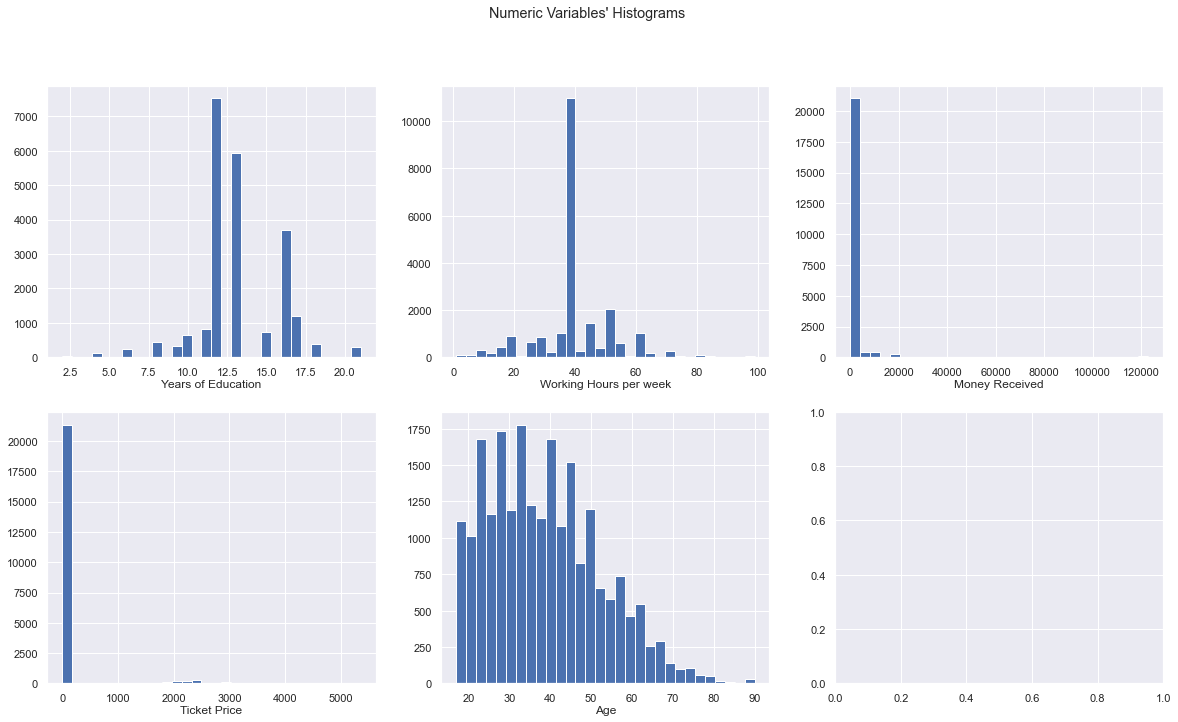

In [15]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_original) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_original): # Notice the zip() function and flatten() method
    ax.hist(train[feat], bins=30)
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)


In [16]:
def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(15, 5))
    
    plt.subplot(121)
    p1 = plt.bar(categories, cont_tab.iloc[:-1, 0].values, 0.55, color="gray")
    p2 = plt.bar(categories, cont_tab.iloc[:-1, 1].values, 0.55, bottom=cont_tab.iloc[:-1, 0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Frequency bar chart")
    plt.xlabel(feature)
    plt.ylabel("$Frequency$")
    plt.xticks(rotation=90)

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")
    plt.xticks(rotation=90)

    plt.show()

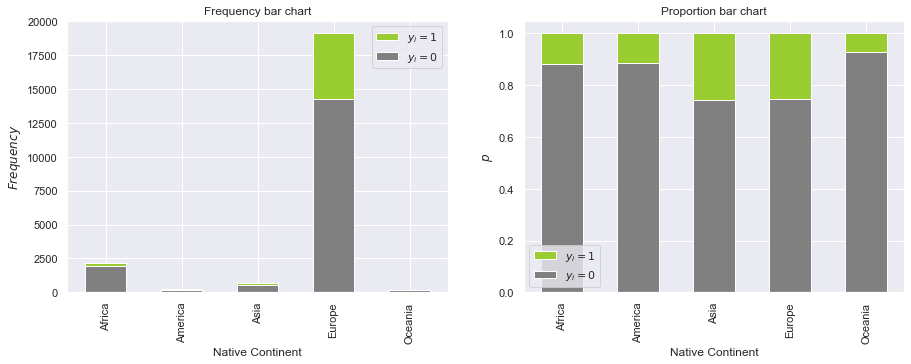

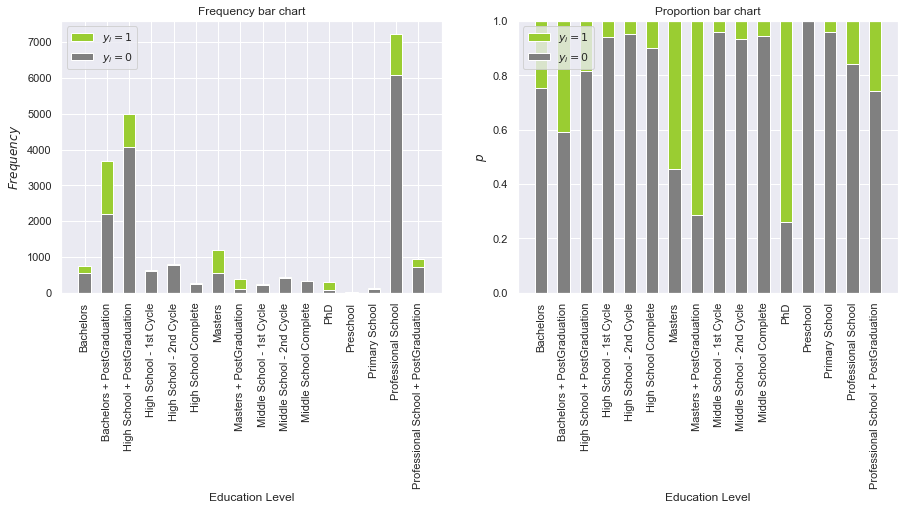

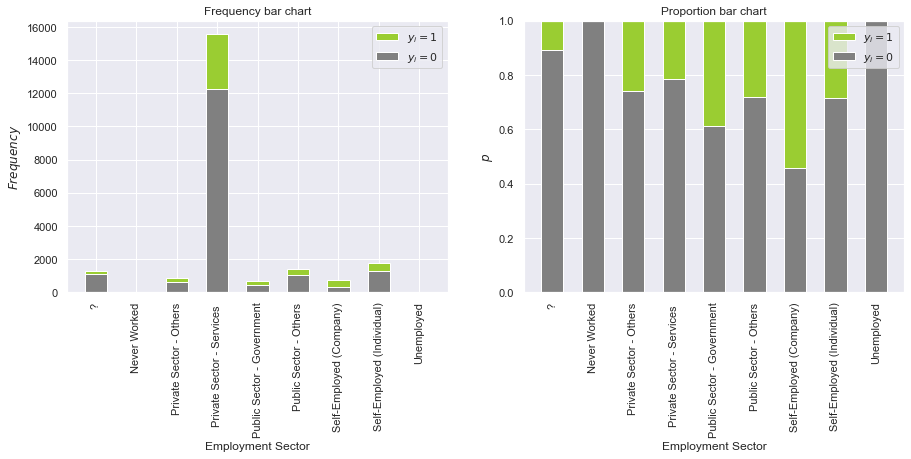

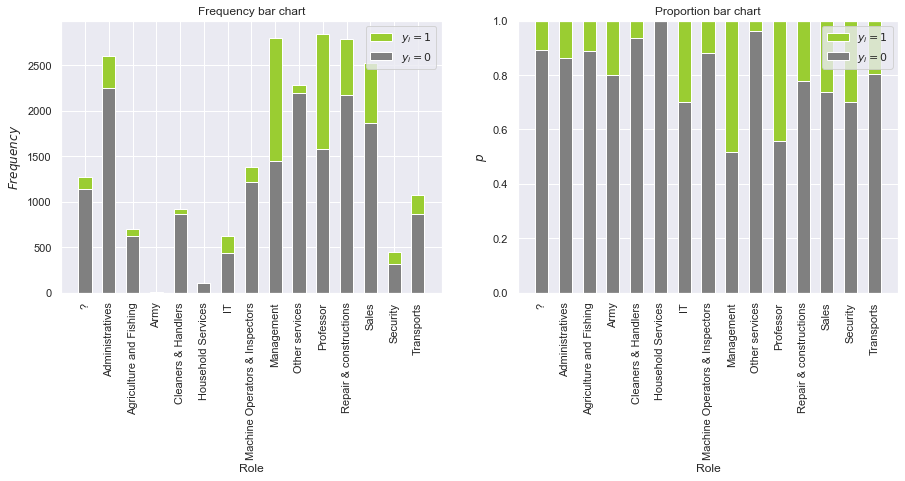

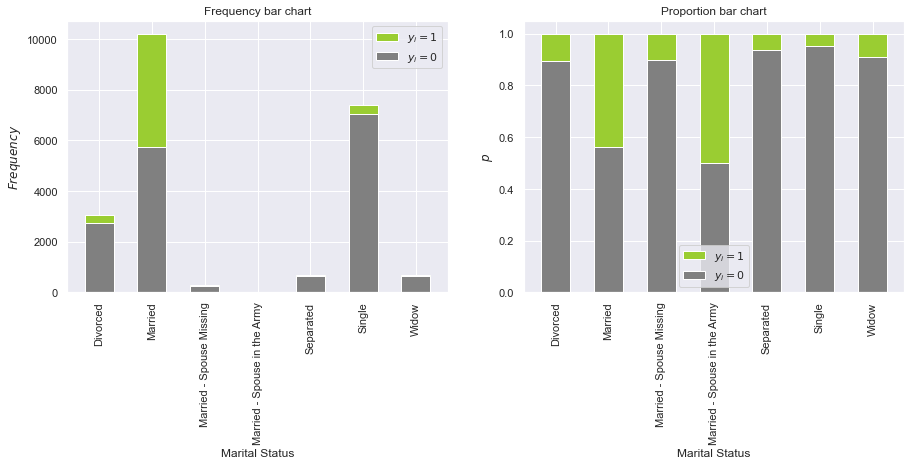

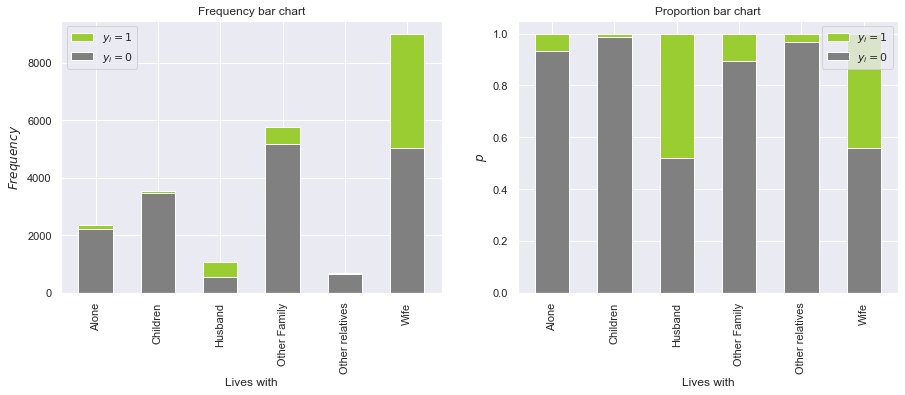

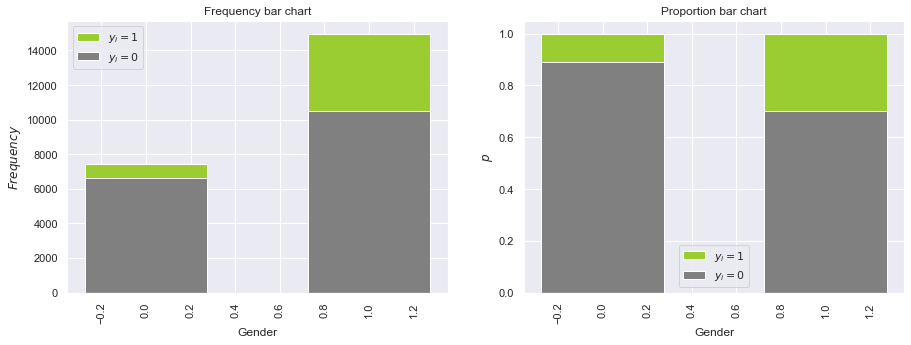

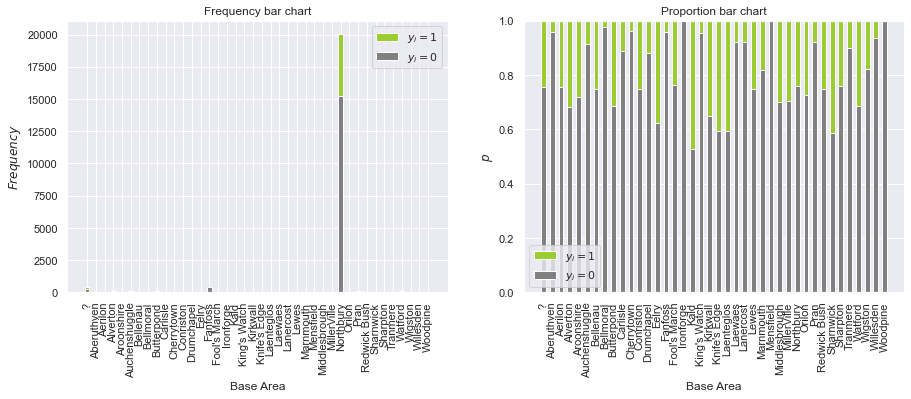

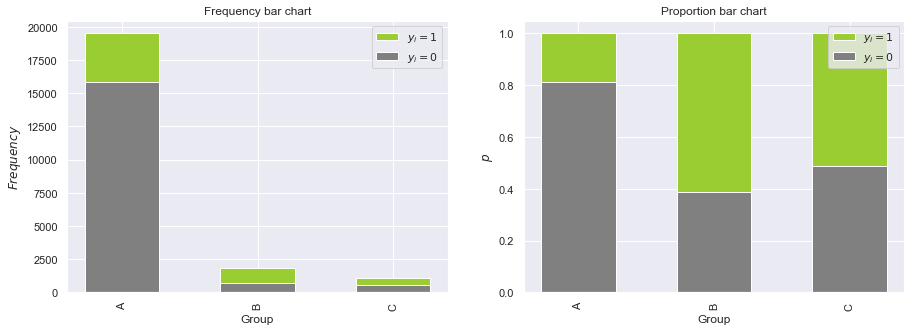

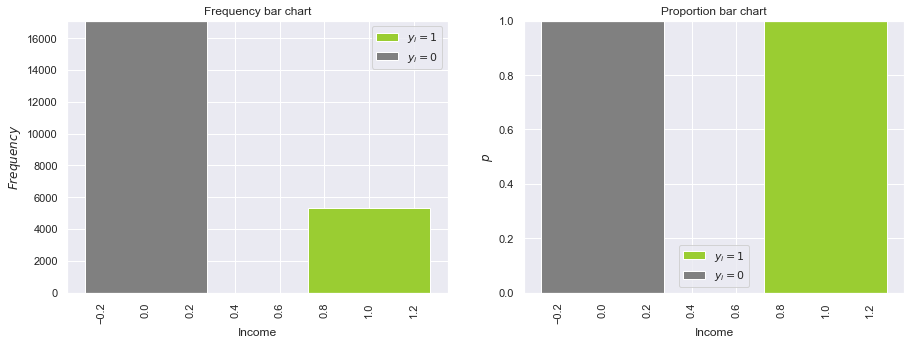

In [17]:
#categorical features plots
nmf = ['Native Continent', 'Education Level', 'Employment Sector', 'Role', 'Marital Status', 'Lives with', 'Gender', 'Base Area'\
      ,'Group', 'Income']
for i in nmf:
    bar_charts_categorical(train, i, 'Income')

## Missing Values

In [18]:
#replace ? with nan so it's easier to analyse the data
train.replace(r'?', np.nan, inplace = True)
test.replace(r'?', np.nan, inplace = True)
train.isna().sum()

CITIZEN_ID                   0
Name                         0
Native Continent             0
Marital Status               0
Lives with                   0
Base Area                  395
Education Level              0
Years of Education           0
Employment Sector         1264
Role                      1271
Working Hours per week       0
Money Received               0
Ticket Price                 0
Income                       0
Gender                       0
Age                          0
Group                        0
dtype: int64

### Clustering for NAN

In [19]:
lista = train[['Years of Education', 'Working Hours per week','Age']]

In [20]:
range_clusters = range(1,15)
inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(lista)
    inertia.append(kmclust.inertia_)

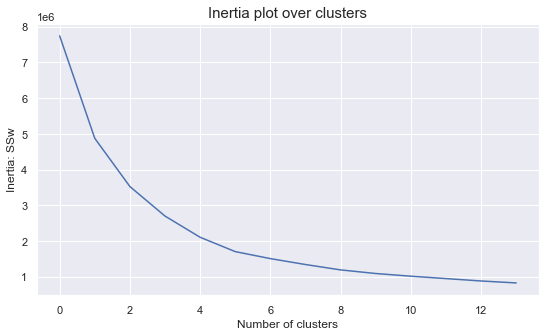

In [21]:
# The inertia plot
plt.figure(figsize=(9,5))
plt.plot(inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

In [22]:
number_clusters = 4
kmclust = KMeans(n_clusters=number_clusters, init='k-means++', n_init=15, random_state=1)
km_labels = kmclust.fit_predict(lista)
km_labels

array([1, 0, 0, ..., 0, 2, 0])

In [23]:
df_concat = pd.concat((train.copy(), pd.Series(km_labels, name='labels')), axis=1)
aa = df_concat.groupby('labels').mean()
# aa

In [24]:
# df_concat.groupby('labels').count()['CITIZEN_ID']

In [25]:
#finding the most common value per label
df_concat.groupby('labels')['Role'].value_counts()

labels  Role                          
0       Repair & constructions            1510
        Administratives                   1359
        Professor                         1228
        Management                        1097
        Sales                             1048
        Other services                     975
        Machine Operators & Inspectors     805
        Cleaners & Handlers                532
        Transports                         466
        IT                                 353
        Agriculture and Fishing            231
        Security                           229
        Household Services                  31
        Army                                 4
1       Management                         947
        Professor                          893
        Repair & constructions             876
        Administratives                    806
        Sales                              651
        Other services                     589
        Machine Opera

### Replacing the nans with the most common value in a cluster

In [26]:
#fill missing value with their neighbours
df_0 = df_concat[df_concat['labels'] == 0]
df_0['Role'].replace(np.nan, 'Repair & constructions',regex=True, inplace= True)
df_1 = df_concat[(df_concat['labels'] == 1)]
df_1['Role'].replace(np.nan, 'Management',regex=True, inplace= True)
df_2 = df_concat[df_concat['labels'] == 2]
df_2['Role'].replace(np.nan, 'Management',regex=True, inplace= True)
df_3 = df_concat[df_concat['labels'] == 3]
df_3['Role'].replace(np.nan, 'Other services',regex=True, inplace= True)

C:\Users\saram\anaconda3\envs\ProgrammingFDS\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
C:\Users\saram\anaconda3\envs\ProgrammingFDS\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
C:\Users\saram\anaconda3\envs\ProgrammingFDS\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

In [27]:
train = pd.concat([df_0,df_1,df_2, df_3])
#after having filled in the NaNs, drop the labels column
train = train.drop(['labels'], axis=1)

In [28]:
#find the mode value of Employment Sector
train['Employment Sector'].value_counts()

Private Sector - Services     15599
Self-Employed (Individual)     1764
Public Sector - Others         1419
Private Sector - Others         880
Self-Employed (Company)         763
Public Sector - Government      692
Unemployed                       12
Never Worked                      7
Name: Employment Sector, dtype: int64

In [28]:
#find the mode value of Base Area
train['Base Area'].value_counts()

Northbury        20074
Fanfoss            443
Alverton           135
Butterpond          96
Watford             83
Auchenshuggle       80
Pran                77
Sharnwick           70
Aroonshire          64
Laewaes             63
Fool's March        59
Wigston             56
Eelry               56
Sharpton            54
Lanercost           52
Cherrytown          51
Aerilon             45
King's Watch        44
Bellmoral           40
Kirkwall            40
Knife's Edge        37
Laenteglos          32
Tranmere            30
Drumchapel          25
Aberuthven          23
Orilon              22
Kald                19
Carlisle            18
MillerVille         17
Willesden           16
Lewes               16
Conriston           12
Marnmouth           11
Middlesbrough       10
Mensfield            9
Woodpine             9
Redwick Bush         8
Bellenau             8
Ironforge            1
Name: Base Area, dtype: int64

In [29]:
#fill missing value with the modes
train['Employment Sector'].replace(np.nan, 'Private Sector - Services',regex=True, inplace= True)
train['Base Area'].replace(np.nan, 'Northbury',regex=True, inplace= True)

## Outlier Removal

In [31]:
train[metric_original].describe()

,Years of Education,Working Hours per week,Money Received,Ticket Price,Age
count,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000
mean,13.173884,40.483795,1324.915357,109.145313,38.584866
std,2.512451,12.370921,9227.771813,500.208904,13.651578
min,2.000000,1.000000,0.000000,0.000000,17.000000
25%,12.000000,40.000000,0.000000,0.000000,28.000000
50%,13.000000,40.000000,0.000000,0.000000,37.000000
75%,15.000000,45.000000,0.000000,0.000000,48.000000
max,21.000000,99.000000,122999.000000,5358.000000,90.000000


In [ ]:
# #checking outliers using Interquartile Range

# q25 = train.quantile(.25)
# q75 = train.quantile(.75)
# iqr = (q75 - q25)

# upper_lim = q75 + 11 * iqr
# lower_lim = q25 - 11 * iqr

# filters = []
# for metric in metric_original:
#     llim = lower_lim[metric]
#     ulim = upper_lim[metric]
#     filters.append(train[metric].between(llim, ulim, inclusive=True))

# filters = pd.Series(np.all(filters, 0))
# train_2 = train[filters] 
# print('Percentage of data kept after removing outliers:', np.round(train_2.shape[0] / train.shape[0], 4))

# #too many 12.9%

In [ ]:
# #checking outliers using Local Outlier Factor
# clf = LocalOutlierFactor(n_neighbors=1)
# preds = clf.fit_predict(train[metric_original])
# unique, counts = np.unique(preds, return_counts=True)
# dict(zip(unique, counts))

# #too many 9.6% (2158/22400)

In [ ]:
# #checking outliers using Isolation Forest

# clf = IsolationForest( behaviour = 'new', max_samples=100, random_state = 10, contamination= 'auto')
# preds = clf.fit_predict(train[metric_original])
# unique, counts = np.unique(preds, return_counts=True)
# dict(zip(unique, counts))
# # -1 are outliers, 1 are not

# #too many 15% (3393/22400)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

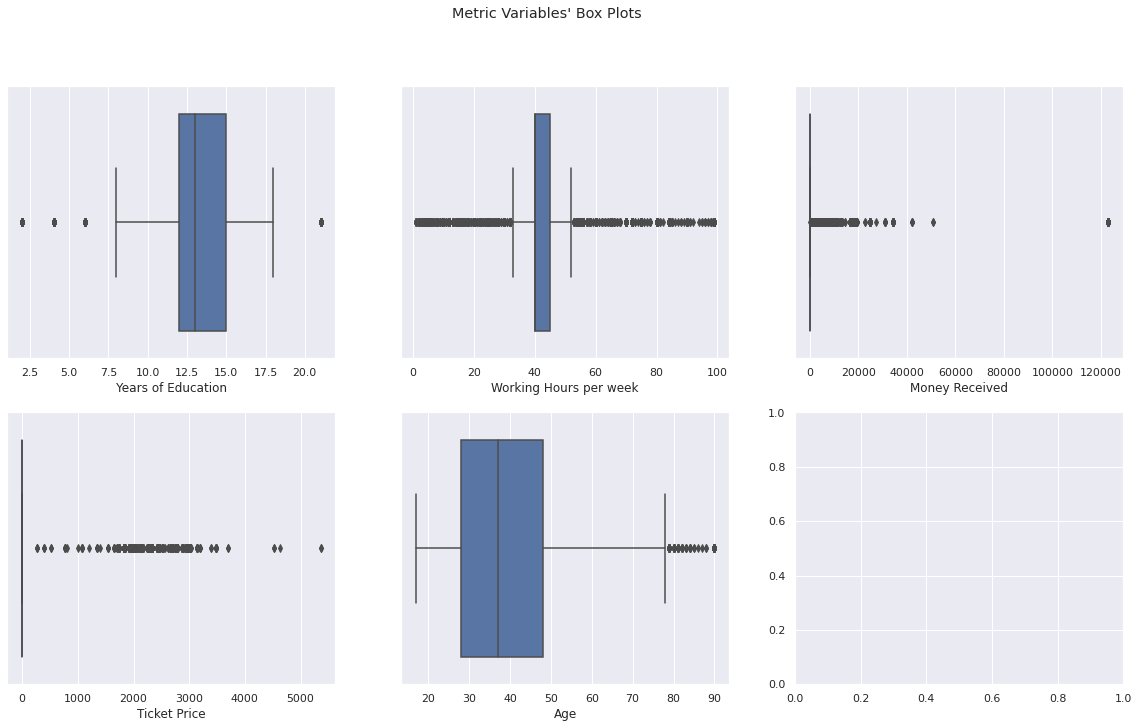

In [39]:
#checking outliers using common sense and visualizations of distributions


# All Metric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2,ceil(len(metric_original) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_original): # Notice the zip() function and flatten() method
    sns.boxplot(train[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Metric Variables' Box Plots"

plt.suptitle(title)

plt.show()

In [40]:
#looking at the Age boxplot, there seems to be a lot of outliers past the 
#upper bound of the interquartile range, thus let's check them (age>80)

#checking the proportion of old seniors in the Age column
proportion1=len(train[train['Age']>80])/len(train)
proportion1


0.0029464285714285716

In [ ]:
# #Further analysis to be sure...

# #These are probably mistakes because someone who is older than 80 wouldn't
# #be paid by the govn to move there...additionally, they wouldn't be working 50
# #hours per week in labour work such as construction
# train.loc[(train['Age']>80) & (train['Money Received']>0)]

# #Thus it is safe to drop them

In [ ]:
# #Further analysis to be sure...

# #These would make sense as even though they are >80 years old, they have
# #a very good job and are probably able to pay to go to the planet

# train.loc[(train['Age']>80) & (train['Ticket Price']>0)] 

# #Thus, we will NOT drop them

In [30]:
#Note: >80 is outside our upper bound in the boxplot

#The purpose of this tax is to keep the planet viable, and so it does not
#make sense to bring very old seniors to the planet as they would just be an
#economic load on it. 
#Thus, given the objective in this case, and the low proportion of old seniors 
#(>80) in the dataset, we can safely consider them as outliers to drop.
#(except the high-paid professors, managers etc who paid to be there as they seem plausible)

old_poor = train.loc[(train['Age']>80) & (train['Ticket Price']==0)].index

train_cleaned = train.drop(old_poor,axis=0)
train_cleaned.shape

(22339, 17)

In [31]:
#working 60 hours per week means 12 hours per day all 5 working days, or 
#8.6 hours per day all 7 days which is absurd

#checking the proportion of >60 hours in the Working Hours per week column
proportion2=len(train_cleaned[train_cleaned['Working Hours per week']>60])/len(train)
proportion2


0.03504464285714286

In [32]:
#Note: >60 is outside our upper bound in the boxplot

#The purpose of this tax is to keep the planet viable, and so this should mean
#avoiding illegal exploitation of people, and ensuring these people can stay
#healthy, alive, and productive by not being over worked.
#Thus, given the objective, and the low proportion of people who work such a 
#high number of hours (extreme), we can safely consider them as outliers to drop.

overworked = train_cleaned.loc[train_cleaned['Working Hours per week']>60].index

train_cleaned = train_cleaned.drop(overworked,axis=0)
train_cleaned.shape

(21554, 17)

In [33]:
#looking at the Years of Education boxplot, there seems to be a lot of outliers 
#past the lower bound of the interquartile range, thus let's check them (<8)

#proportion of people with <Middle School-2nd Cycle level of education 
proportion3=len(train_cleaned[train_cleaned['Years of Education']<8])/len(train)
proportion3

#if a person did not get to Grade 2, that means they cannot read and write

0.016785714285714286

In [34]:
#Further analysis to be sure...

#0.06% (13/22400) people with <8 years of educ who got paid to go there

#they are mostly quite old with labour jobs, while the younger uneducated ones
#are pais a lot (e.g. 50k)...this doesnt make sense so probably a mistake
train_cleaned.loc[(train_cleaned['Years of Education']<8) & (train_cleaned['Money Received']>0)]

#Thus it is safe to drop them

,CITIZEN_ID,Name,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income,Gender,Age,Group
1680,14166,Mr. Jonathan Clarkson,Oceania,Married,Wife,Fanfoss,Middle School - 1st Cycle,6,Private Sector - Services,Other services,40,4999,0,0,1,40,B
1869,14355,Mr. Gavin Hughes,Europe,Married,Wife,Fanfoss,Middle School - 1st Cycle,6,Private Sector - Services,Agriculture and Fishing,40,4196,0,0,1,41,B
12275,24761,Mr. Dominic Marshall,Europe,Married,Wife,Fanfoss,Middle School - 1st Cycle,6,Private Sector - Services,Machine Operators & Inspectors,40,8977,0,1,1,36,B
18685,31171,Mr. Evan Tucker,Europe,Married,Wife,Fanfoss,Middle School - 1st Cycle,6,Private Sector - Services,Machine Operators & Inspectors,40,4261,0,0,1,30,B
20791,33277,Mr. Robert Tucker,Europe,Single,Other Family,King's Watch,Primary School,4,Private Sector - Services,Repair & constructions,40,4519,0,0,1,32,B
21408,33894,Miss Karen Gibson,Europe,Single,Other relatives,Auchenshuggle,Middle School - 1st Cycle,6,Private Sector - Services,Household Services,40,2676,0,0,0,27,B
1492,13978,Mrs. Lily Fisher,Europe,Widow,Other relatives,Northbury,Middle School - 1st Cycle,6,Private Sector - Services,Other services,40,2886,0,0,0,70,B
10801,23287,Mr. Joshua Vance,Asia,Married,Wife,Alverton,Middle School - 1st Cycle,6,Private Sector - Services,Cleaners & Handlers,40,8977,0,1,1,61,B
13533,26019,Mr. Anthony Rampling,Europe,Divorced,Alone,Northbury,Middle School - 1st Cycle,6,Private Sector - Services,Transports,40,7991,0,0,1,57,B
17432,29918,Mr. Christopher Burgess,Europe,Married,Wife,Auchenshuggle,Middle School - 1st Cycle,6,Self-Employed (Individual),Other services,15,3173,0,0,1,59,B


In [35]:
#Further analysis to be sure...

#0.06% (13/22400) people with <8 years of educ who paid money to go there

train_cleaned.loc[(train_cleaned['Years of Education']<8) & (train_cleaned['Ticket Price']>0)]

#people with barely any education but managed to pay to go there (could be from parents?)

,CITIZEN_ID,Name,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income,Gender,Age,Group
3287,15773,Mr. Julian Greene,Europe,Married,Wife,Fanfoss,Preschool,2,Private Sector - Services,Other services,40,0,2057,0,1,40,C
4858,17344,Mr. Adrian Chapman,Europe,Married - Spouse Missing,Other Family,Fanfoss,Preschool,2,Private Sector - Services,Machine Operators & Inspectors,40,0,2114,0,1,26,C
6923,19409,Mr. Richard Mackenzie,Europe,Married,Other Family,Fanfoss,Primary School,4,Private Sector - Services,Repair & constructions,32,0,3202,0,1,33,C
14536,27022,Mr. Sebastian Greene,Europe,Married,Wife,Northbury,Middle School - 1st Cycle,6,Private Sector - Services,Repair & constructions,50,0,2002,0,1,26,C
10444,22930,Mr. Jake Quinn,Europe,Married,Wife,Orilon,Middle School - 1st Cycle,6,Private Sector - Services,Other services,40,0,3202,0,1,49,C
14874,27360,Mrs. Chloe May,Europe,Widow,Other relatives,Bellmoral,Primary School,4,Self-Employed (Individual),Repair & constructions,45,0,1970,0,0,57,C
15141,27627,Mr. Luke Lee,Europe,Married,Wife,Northbury,Primary School,4,Self-Employed (Individual),Transports,18,0,2680,0,1,58,C
17750,30236,Mr. Alan Wallace,Europe,Divorced,Other Family,Northbury,Middle School - 1st Cycle,6,Private Sector - Services,Transports,56,0,2307,0,1,61,C
17995,30481,Mrs. Deirdre Short,Europe,Divorced,Other Family,Northbury,Middle School - 1st Cycle,6,Private Sector - Services,Repair & constructions,45,0,2877,0,0,46,C
18535,31021,Mr. Phil Clark,America,Married,Wife,Northbury,Middle School - 1st Cycle,6,Private Sector - Services,Transports,40,0,2339,0,1,46,C


In [36]:
#Note: <8 is outside our lower bound in the boxplot

#The purpose of this tax is to keep the planet viable, and this small percentage
#of people with very low education and very low-paying jobs would not be able to
#pay taxes regardless. 
#Thus, given the objective, and the low proportion of people with such low 
#education level (<8 years), we can safely consider them as outliers to drop.

#This is better for our model as they would create wrongful bias...
loweducation = train_cleaned.loc[train_cleaned['Years of Education']<8].index

train_cleaned = train_cleaned.drop(loweducation,axis=0)
train_cleaned.shape

(21178, 17)

In [49]:
#check shape after dropping everything and if you dropped <5%
#1222 rows = 5.5% of dataset dropped

### Processing the set without outliers

In [38]:
#target encoded variables for category variables

In [39]:
mean = train_cleaned['Income'].mean()

In [40]:
agg = train_cleaned.groupby('Lives with')['Income'].agg(['count','mean'])
counts = agg['count']
means = agg['mean']
weight  = 100
#smoothed means
smooth = (counts * means + weight * mean) / (counts + weight)
print(smooth)
train_cleaned.loc[:, 'Lives_smean_enc'] = train_cleaned['Lives with'].map(smooth)

Lives with
Alone              0.073837
Children           0.019689
Husband            0.462711
Other Family       0.106697
Other relatives    0.062860
Wife               0.443937
dtype: float64


In [41]:
agg = train_cleaned.groupby('Education Level')['Income'].agg(['count','mean'])
counts = agg['count']
means = agg['mean']
weight  = 100
#smoothed means
smooth = (counts * means + weight * mean) / (counts + weight)
print(smooth)
train_cleaned.loc[:, 'Education_smean_enc'] = train_cleaned['Education Level'].map(smooth)

Education Level
Bachelors                               0.241349
Bachelors + PostGraduation              0.400245
High School + PostGraduation            0.184262
High School - 1st Cycle                 0.083955
High School - 2nd Cycle                 0.066477
High School Complete                    0.130102
Masters                                 0.516856
Masters + PostGraduation                0.606400
Middle School - 2nd Cycle               0.097010
Middle School Complete                  0.095860
PhD                                     0.606404
Professional School                     0.156132
Professional School + PostGraduation    0.255587
dtype: float64


In [42]:
agg = train_cleaned.groupby('Role')['Income'].agg(['count','mean'])
counts = agg['count']
means = agg['mean']
weight  = 100
#smoothed means
smooth = (counts * means + weight * mean) / (counts + weight)
print(smooth)
train_cleaned.loc[:, 'Role_smean_enc'] = train_cleaned['Role'].map(smooth)

Role
Administratives                   0.142851
Agriculture and Fishing           0.132661
Army                              0.235230
Cleaners & Handlers               0.082334
Household Services                0.130215
IT                                0.290488
Machine Operators & Inspectors    0.128632
Management                        0.427912
Other services                    0.045264
Professor                         0.431502
Repair & constructions            0.200411
Sales                             0.256036
Security                          0.290855
Transports                        0.192930
dtype: float64


In [43]:
agg = train_cleaned.groupby('Marital Status')['Income'].agg(['count','mean'])
counts = agg['count']
means = agg['mean']
weight  = 100
#smoothed means
smooth = (counts * means + weight * mean) / (counts + weight)
print(smooth)
train_cleaned.loc[:, 'Marital_smean_enc'] = train_cleaned['Marital Status'].map(smooth)

Marital Status
Divorced                        0.108897
Married                         0.443063
Married - Spouse Missing        0.141191
Married - Spouse in the Army    0.269291
Separated                       0.088110
Single                          0.049551
Widow                           0.109053
dtype: float64


In [44]:
agg = train_cleaned.groupby('Native Continent')['Income'].agg(['count','mean'])
counts = agg['count']
means = agg['mean']
weight  = 100
#smoothed means
smooth = (counts * means + weight * mean) / (counts + weight)
print(smooth)
train_cleaned.loc[:, 'Continent_smean_enc'] = train_cleaned['Native Continent'].map(smooth)

Native Continent
Africa     0.123232
America    0.155372
Asia       0.253948
Europe     0.253154
Oceania    0.132710
dtype: float64


In [45]:
agg = train_cleaned.groupby('Employment Sector')['Income'].agg(['count','mean'])
counts = agg['count']
means = agg['mean']
weight  = 100
#smoothed means
smooth = (counts * means + weight * mean) / (counts + weight)
print(smooth)
train_cleaned.loc[:, 'Employment_smean_enc'] = train_cleaned['Employment Sector'].map(smooth)

Employment Sector
Never Worked                  0.221487
Private Sector - Others       0.253101
Private Sector - Services     0.119239
Private Sector - Services     0.216342
Public Sector - Government    0.368644
Public Sector - Others        0.278864
Self-Employed (Company)       0.500260
Self-Employed (Individual)    0.288036
Unemployed                    0.213506
dtype: float64


In [46]:
agg = train_cleaned.groupby('Base Area')['Income'].agg(['count','mean'])
counts = agg['count']
means = agg['mean']
weight  = 100
#smoothed means
smooth = (counts * means + weight * mean) / (counts + weight)
print(smooth)
train_cleaned.loc[:, 'Area_smean_enc'] = train_cleaned['Base Area'].map(smooth)

Base Area
Aberuthven       0.204125
Aerilon          0.240966
Alverton         0.282428
Aroonshire       0.265600
Auchenshuggle    0.198059
Bellenau         0.237955
Bellmoral        0.178979
Butterpond       0.269266
Carlisle         0.219651
Cherrytown       0.182263
Conriston        0.235772
Drumchapel       0.220654
Eelry            0.302831
Fanfoss          0.099456
Fool's March     0.238306
Ironforge        0.234645
Kald             0.270933
King's Watch     0.190364
Kirkwall         0.258689
Knife's Edge     0.271845
Laenteglos       0.280146
Laewaes          0.178255
Lanercost        0.184661
Lewes            0.238786
Marnmouth        0.226597
Mensfield        0.217423
Middlesbrough    0.244946
MillerVille      0.240862
Northbury        0.240202
Orilon           0.234738
Pran             0.177839
Redwick Bush     0.237955
Sharnwick        0.299392
Sharpton         0.241442
Tranmere         0.203961
Watford          0.266476
Wigston          0.220940
Willesden        0.207887
Wo

In [47]:
categories=[
 'Native Continent','Lives with','Base Area','Education Level','Employment Sector','Group','Role','Marital Status'] 

In [48]:
# Use OneHotEncoder to encode the categorical features. Get feature names and create a DataFrame 
# with the one-hot encoded categorical features (pass feature names)
ohc = OneHotEncoder(sparse=False, drop="first")
ohc_feat = ohc.fit_transform(train_cleaned[categories])
ohc_feat_names = ohc.get_feature_names()
ohc_df = pd.DataFrame(ohc_feat, index=train_cleaned.index, columns=ohc_feat_names) 
ohc_df

,x0_America,x0_Asia,x0_Europe,x0_Oceania,x1_Children,x1_Husband,x1_Other Family,x1_Other relatives,x1_Wife,x2_Aerilon,...,x6_Repair & constructions,x6_Sales,x6_Security,x6_Transports,x7_Married,x7_Married - Spouse Missing,x7_Married - Spouse in the Army,x7_Separated,x7_Single,x7_Widow
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22317,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22319,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22330,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22361,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [49]:
# Reassigning df to contain ohc variables
train_cleaned = pd.concat([train_cleaned, ohc_df], axis=1)

In [50]:
metrics = ['Years of Education', 'Working Hours per week', 'Money Received',
       'Ticket Price', 'Gender', 'Age', 'Lives_smean_enc',
       'Education_smean_enc', 'Role_smean_enc', 'Marital_smean_enc',
       'Continent_smean_enc', 'Employment_smean_enc', 'Area_smean_enc']

In [51]:
#create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
train_cleaned[metrics] = scaler.fit_transform(train_cleaned[metrics])
train_cleaned.head(2)

,CITIZEN_ID,Name,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,...,x6_Repair & constructions,x6_Sales,x6_Security,x6_Transports,x7_Married,x7_Married - Spouse Missing,x7_Married - Spouse in the Army,x7_Separated,x7_Single,x7_Widow
1,12487,Mr. Cameron McDonald,Europe,Married,Wife,Northbury,Professional School,0.307692,Public Sector - Others,Repair & constructions,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,12488,Mr. Keith Davidson,Europe,Married,Wife,Northbury,Professional School,0.307692,Private Sector - Services,Sales,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [52]:
train_cleaned.reset_index(inplace = True)

## Feature Selection and Analysis

In [ ]:
## RFE continuous variables

In [ ]:
#RFE for continous variables selected all the feauters as important for our model as you can see below. 

In [65]:
# X = train[metric_original]
# target = train['Income']

# rfc = RandomForestClassifier(random_state=101)
# rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
# rfecv.fit(X, target)

In [67]:
# print('Optimal number of features: {}'.format(rfecv.n_features_))

In [69]:
# plt.figure(figsize=(16, 9))
# plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
# plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
# plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
# plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

# plt.show()

In [ ]:
## Chi-Square for categorical variables

In [80]:
# categories_2=[ 'Native Continent','Lives with','Gender','Base Area','Education Level','Employment Sector','Role','Marital Status'] 

In [81]:
# X = train[categories_2]
# y = train['Income']

In [82]:
# # prepare input data
# def prepare_inputs(X):
# 	oe = OrdinalEncoder()
# 	oe.fit(X)
# 	X_enc = oe.transform(X)
# 	return X_enc
 
# # prepare target
# def prepare_targets(y):
# 	le = LabelEncoder()
# 	le.fit(y)
# 	y_enc = le.transform(y)
# 	return y_enc

In [83]:
# # prepare input data
# X_enc = prepare_inputs(X)
# # prepare output data
# y_enc = prepare_targets(y)

In [84]:
# X_train, X_test, y_train, y_test = train_test_split(X_enc, y_enc, test_size=0.33, random_state=1)

In [ ]:
## Feature selection categoricals

In [85]:
# # feature selection
# def select_features(X_train, y_train, X_test):
# 	fs = SelectKBest(score_func=chi2, k='all')
# 	fs.fit(X_train, y_train)
# 	X_train_fs = fs.transform(X_train)
# 	X_test_fs = fs.transform(X_test)
# 	return X_train_fs, X_test_fs, fs

In [ ]:
# # feature selection
# X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# # what are scores for the features
# for i in range(len(fs.scores_)):
# 	print('Feature %d: %f' % (i, fs.scores_[i]))
# # plot the scores
# pyplot.bar([i for i in range(len(fs.scores_))],
#  fs.scores_)
# pyplot.xlabel('categories', fontweight='bold')
 
# pyplot.show()

In [ ]:
# #categorical variables to use!
# i = [1,2,4,6,7]
# for i in i:
#   print(categories_2[i])

## Categorical in Mean Encoding

In [53]:
mean = train['Income'].mean()

In [54]:
agg = train.groupby('Lives with')['Income'].agg(['count','mean'])
counts = agg['count']
means = agg['mean']
weight  = 100
#smoothed means
smooth = (counts * means + weight * mean) / (counts + weight)
print(smooth)
train.loc[:, 'Lives_smean_enc'] = train['Lives with'].map(smooth)

Lives with
Alone              0.075024
Children           0.019815
Husband            0.459277
Other Family       0.106808
Other relatives    0.059808
Wife               0.438401
dtype: float64


In [55]:
agg = train.groupby('Education Level')['Income'].agg(['count','mean'])
counts = agg['count']
means = agg['mean']
weight  = 100
#smoothed means
smooth = (counts * means + weight * mean) / (counts + weight)
print(smooth)
train.loc[:, 'Education_smean_enc'] = train['Education Level'].map(smooth)

Education Level
Bachelors                               0.243964
Bachelors + PostGraduation              0.402189
High School + PostGraduation            0.186437
High School - 1st Cycle                 0.083725
High School - 2nd Cycle                 0.068988
High School Complete                    0.133617
Masters                                 0.521044
Masters + PostGraduation                0.617122
Middle School - 1st Cycle               0.100029
Middle School - 2nd Cycle               0.099079
Middle School Complete                  0.096629
PhD                                     0.611079
Preschool                               0.178269
Primary School                          0.129324
Professional School                     0.158853
Professional School + PostGraduation    0.255185
dtype: float64


In [56]:
agg = train.groupby('Role')['Income'].agg(['count','mean'])
counts = agg['count']
means = agg['mean']
weight  = 100
#smoothed means
smooth = (counts * means + weight * mean) / (counts + weight)
print(smooth)
train.loc[:, 'Role_smean_enc'] = train['Role'].map(smooth)

Role
Administratives                   0.142433
Agriculture and Fishing           0.128067
Army                              0.235332
Cleaners & Handlers               0.079951
Household Services                0.117375
IT                                0.290234
Machine Operators & Inspectors    0.125815
Management                        0.426024
Other services                    0.044718
Professor                         0.436999
Repair & constructions            0.199912
Sales                             0.261007
Security                          0.286745
Transports                        0.199581
dtype: float64


In [57]:
agg = train.groupby('Marital Status')['Income'].agg(['count','mean'])
counts = agg['count']
means = agg['mean']
weight  = 100
#smoothed means
smooth = (counts * means + weight * mean) / (counts + weight)
print(smooth)
train.loc[:, 'Marital_smean_enc'] = train['Marital Status'].map(smooth)

Marital Status
Divorced                        0.110564
Married                         0.437224
Married - Spouse Missing        0.137265
Married - Spouse in the Army    0.269384
Separated                       0.084743
Single                          0.050254
Widow                           0.107676
dtype: float64


In [58]:
agg = train.groupby('Native Continent')['Income'].agg(['count','mean'])
counts = agg['count']
means = agg['mean']
weight  = 100
#smoothed means
smooth = (counts * means + weight * mean) / (counts + weight)
print(smooth)
train.loc[:, 'Continent_smean_enc'] = train['Native Continent'].map(smooth)

Native Continent
Africa     0.124053
America    0.152695
Asia       0.256208
Europe     0.252757
Oceania    0.129260
dtype: float64


In [59]:
agg = train.groupby('Employment Sector')['Income'].agg(['count','mean'])
counts = agg['count']
means = agg['mean']
weight  = 100
#smoothed means
smooth = (counts * means + weight * mean) / (counts + weight)
print(smooth)
train.loc[:, 'Employment_smean_enc'] = train['Employment Sector'].map(smooth)

Employment Sector
Never Worked                  0.221587
Private Sector - Others       0.256847
Private Sector - Services     0.117089
Private Sector - Services     0.215855
Public Sector - Government    0.368320
Public Sector - Others        0.277623
Self-Employed (Company)       0.508354
Self-Employed (Individual)    0.281497
Unemployed                    0.211695
dtype: float64


In [60]:
agg = train.groupby('Base Area')['Income'].agg(['count','mean'])
counts = agg['count']
means = agg['mean']
weight  = 100
#smoothed means
smooth = (counts * means + weight * mean) / (counts + weight)
print(smooth)
train.loc[:, 'Area_smean_enc'] = train['Base Area'].map(smooth)

Base Area
Aberuthven       0.200893
Aerilon          0.239378
Alverton         0.283872
Aroonshire       0.254328
Auchenshuggle    0.170610
Bellenau         0.238054
Bellmoral        0.176499
Butterpond       0.274030
Carlisle         0.217880
Cherrytown       0.170264
Conriston        0.238481
Drumchapel       0.213679
Eelry            0.286601
Fanfoss          0.078655
Fool's March     0.237169
Ironforge        0.234751
Kald             0.274872
King's Watch     0.178540
Kirkwall         0.269356
Knife's Edge     0.282553
Laenteglos       0.278105
Laewaes          0.176134
Lanercost        0.182301
Lewes            0.238878
Marnmouth        0.231620
Mensfield        0.217521
Middlesbrough    0.242817
MillerVille      0.245383
Northbury        0.242390
Orilon           0.243523
Pran             0.167852
Redwick Bush     0.238054
Sharnwick        0.310058
Sharpton         0.238375
Tranmere         0.205460
Watford          0.271638
Wigston          0.216089
Willesden        0.213016
Wo

In [61]:
train.head(2)

,CITIZEN_ID,Name,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,...,Gender,Age,Group,Lives_smean_enc,Education_smean_enc,Role_smean_enc,Marital_smean_enc,Continent_smean_enc,Employment_smean_enc,Area_smean_enc
1,12487,Mr. Cameron McDonald,Europe,Married,Wife,Northbury,Professional School,12,Public Sector - Others,Repair & constructions,...,1,42,A,0.438401,0.158853,0.199912,0.437224,0.252757,0.277623,0.24239
2,12488,Mr. Keith Davidson,Europe,Married,Wife,Northbury,Professional School,12,Private Sector - Services,Sales,...,1,39,C,0.438401,0.158853,0.261007,0.437224,0.252757,0.215855,0.24239


In [62]:
train.reset_index(inplace = True)

## Encoding Categorical Variables (More Feature Engineering)

In [63]:
# Use OneHotEncoder to encode the categorical features. Get feature names and create a DataFrame 
# with the one-hot encoded categorical features (pass feature names)
ohc = OneHotEncoder(sparse=False, drop="first")
ohc_feat = ohc.fit_transform(train[categories])
ohc_feat_names = ohc.get_feature_names()
ohc_df = pd.DataFrame(ohc_feat, index=train.index, columns=ohc_feat_names) 

In [64]:
# Reassigning df to contain ohc variables
train = pd.concat([train, ohc_df], axis=1)

## Data Scaling

In [65]:
#create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
train[metrics] = scaler.fit_transform(train[metrics])
# train.head(2)

In [66]:
train.reset_index(inplace = True)

## Defining the final data to be used and some variables

In [67]:
train = train.drop(['CITIZEN_ID', 'Name', 'index'], axis=1)

In [68]:
to_drop = ['Income','Lives_smean_enc', 'Education_smean_enc', 'Role_smean_enc', 'Marital_smean_enc', 'Continent_smean_enc',
 'Employment_smean_enc', 'Area_smean_enc','Group','Native Continent', 'Marital Status', 'Lives with', 'Base Area', 'Education Level','Employment Sector',
 'Role', 'level_0'] #, 'index'
log_features = train.drop(to_drop,axis=1).columns.tolist()

## Visualizations for Hypothesis


In [107]:
# age_0 = train['Age'].loc[train['Income']==0]
# age_1 = train['Age'].loc[train['Income']==1]

# labels = ['Income=0', 'Income=1']
# plt.hist([age_0,age_1], bins = int(180/15), stacked=True, label=labels)

# # Plot formatting
# plt.legend()
# plt.xlabel('Age')
# plt.ylabel('# of citizens')
# plt.title('Ages of Citizens vs Income')

In [108]:
# educ_0 = train['Years of Education'].loc[train['Income']==0]
# educ_1 = train['Years of Education'].loc[train['Income']==1]

# labels = ['Income=0', 'Income=1']
# plt.hist([educ_0,educ_1], bins = int(180/15), stacked=True, label=labels)


# # Plot formatting
# plt.legend()
# plt.xlabel('Years of Education')
# plt.ylabel('# of citizens')
# plt.title('Education of Citizens vs Income')

In [109]:
# gender_0 = train['Gender'].loc[train['Income']==0]
# gender_1 = train['Gender'].loc[train['Income']==1]

# labels = ['Income=0', 'Income=1']
# plt.hist([gender_0,gender_1], bins = int(180/15), stacked=True, label=labels)

# #xaxis ...0 is female, 1 is male

# # Plot formatting
# plt.legend()
# plt.xlabel('Gender')
# plt.ylabel('# of citizens')
# plt.title('Gender of Citizens vs Income')

# Preparing Test Set

In [69]:
#create a Gender variable:
conditions = [
    (test['Name'].str[:3] == "Mr."),
    (test['Name'].str[:4] == "Mrs."),
    (test['Name'].str[:4] == "Miss")
    ]

# create a list of the values we want to assign for each condition.
#1 for male, 0 for female
values = [1, 0, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
test['Gender'] = np.select(conditions, values)

In [70]:
#create Age variable:
test['Birthday'].to_string
test['Birthday_year'] = test['Birthday'].str[-4:]
#because we are in the future we check the age of people in 2048
test['Age'] = 2048 - test['Birthday_year'].astype(int)
#create var Age
test['Age']
test.drop(['Birthday'], axis = 1, inplace = True)
test = test.drop(['Birthday_year'], axis=1)

In [71]:
#create a GROUP variable:
# create a list of our conditions
conditions = [
    (test['Money Received']>0),
    (test['Ticket Price']>0),
    ((test['Money Received']==0) & (test['Ticket Price']==0) )
    ]

# create a list of the values we want to assign for each condition
values = ["B", "C", "A"]

# create a new column and use np.select to assign values to it using our lists as arguments
test['Group'] = np.select(conditions, values)

In [72]:
# fit and transform Test set
listb = test[['Years of Education', 'Working Hours per week','Age']]

In [73]:
range_clusters = range(1,15)
inertia2 = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust2 = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust2.fit(listb)
    inertia2.append(kmclust2.inertia_)

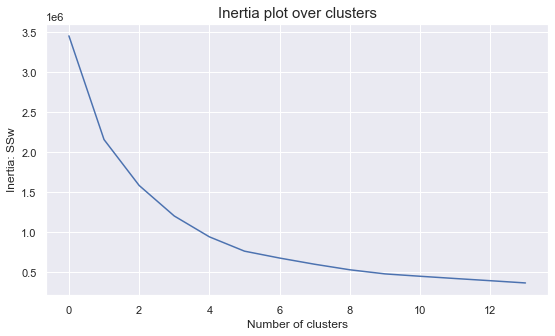

In [74]:
# The inertia plot
plt.figure(figsize=(9,5))
plt.plot(inertia2)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

In [75]:
number_clusters = 4
kmclust2 = KMeans(n_clusters=number_clusters, init='k-means++', n_init=15, random_state=1)
km_labels2 = kmclust2.fit_predict(listb)
km_labels2

array([1, 1, 1, ..., 3, 1, 0])

In [76]:
df_concat2 = pd.concat((test.copy(), pd.Series(km_labels2, name='labels')), axis=1)
bb = df_concat2.groupby('labels').mean()

In [77]:
#finding the most common value per label
df_concat2.groupby('labels')['Role'].value_counts()

labels  Role                          
0       Management                        419
        Repair & constructions            405
        Professor                         398
        Administratives                   353
        Sales                             273
        Other services                    264
        Machine Operators & Inspectors    182
        Transports                        161
        Cleaners & Handlers                84
        IT                                 79
        Agriculture and Fishing            77
        Security                           57
        Household Services                 19
1       Repair & constructions            692
        Administratives                   584
        Professor                         541
        Management                        473
        Sales                             453
        Other services                    419
        Machine Operators & Inspectors    362
        Cleaners & Handlers              

In [78]:
#fill missing value with their neighbours
df_0b = df_concat2[(df_concat2['labels'] == 0)]
df_0b['Role'].replace(np.nan, 'Management',regex=True, inplace= True)
df_1b = df_concat2[df_concat2['labels'] == 1]
df_1b['Role'].replace(np.nan, 'Repair & constructions',regex=True, inplace= True)
df_2b = df_concat2[df_concat2['labels'] == 2]
df_2b['Role'].replace(np.nan, 'Management',regex=True, inplace= True)
df_3b = df_concat2[df_concat2['labels'] == 3]
df_3b['Role'].replace(np.nan, 'Other services',regex=True, inplace= True)

C:\Users\saram\anaconda3\envs\ProgrammingFDS\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
C:\Users\saram\anaconda3\envs\ProgrammingFDS\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
C:\Users\saram\anaconda3\envs\ProgrammingFDS\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

In [79]:
test = pd.concat([df_0b,df_1b,df_2b, df_3b])
#after having filled in the NaNs, drop the labels column
test = test.drop(['labels'], axis=1)

In [80]:
test.isna().sum()

CITIZEN_ID                  0
Name                        0
Native Continent            0
Marital Status              0
Lives with                  0
Base Area                 187
Education Level             0
Years of Education          0
Employment Sector         570
Role                        0
Working Hours per week      0
Money Received              0
Ticket Price                0
Gender                      0
Age                         0
Group                       0
dtype: int64

In [81]:
#find the mode value of Employment Sector
test['Employment Sector'].value_counts()

Private Sector - Services     7052
Self-Employed (Individual)     772
Public Sector - Others         672
Private Sector - Others        417
Self-Employed (Company)        349
Public Sector - Government     266
Unemployed                       2
Name: Employment Sector, dtype: int64

In [82]:
#find the mode value of Base Area
test['Base Area'].value_counts()

Northbury        9055
Fanfoss           200
Alverton           63
Butterpond         40
Watford            38
Pran               37
Laewaes            35
Fool's March       31
Aroonshire         31
Sharnwick          30
Lanercost          29
Auchenshuggle      26
Wigston            24
Kirkwall           22
Sharpton           21
King's Watch       20
Cherrytown         19
Bellmoral          19
Eelry              17
Aerilon            15
Knife's Edge       14
Tranmere           14
Willesden          12
Drumchapel         12
Laenteglos         11
Aberuthven         11
Kald               10
Middlesbrough       9
Lewes               8
Orilon              7
Marnmouth           7
Conriston           6
Mensfield           5
Redwick Bush        5
Bellenau            4
Woodpine            3
MillerVille         3
Name: Base Area, dtype: int64

In [83]:
#fill missing value with the modes
test['Employment Sector'].replace(np.nan, 'Private Sector - Services',regex=True, inplace= True)
test['Base Area'].replace(np.nan, 'Northbury',regex=True, inplace= True)

In [84]:
# test.head(2)

In [85]:
mapping = dict(train[['Native Continent', 'Continent_smean_enc']].values)
test['Continent_smean_enc'] = test['Native Continent'].map(mapping)
mapping = dict(train[['Marital Status', 'Marital_smean_enc']].values)
test['Marital_smean_enc'] = test['Marital Status'].map(mapping)
mapping = dict(train[['Role', 'Role_smean_enc']].values)
test['Role_smean_enc'] = test['Role'].map(mapping)
mapping = dict(train[['Education Level', 'Education_smean_enc']].values)
test['Education_smean_enc'] = test['Education Level'].map(mapping)
mapping = dict(train[['Lives with', 'Lives_smean_enc']].values)
test['Lives_smean_enc'] = test['Lives with'].map(mapping)
mapping = dict(train[['Base Area', 'Area_smean_enc']].values)
test['Area_smean_enc'] = test['Base Area'].map(mapping)
mapping = dict(train[['Employment Sector', 'Employment_smean_enc']].values)
test['Employment_smean_enc'] = test['Employment Sector'].map(mapping)

In [86]:
# test[['Role','Role_smean_enc']]

In [87]:
test.reset_index(inplace = True)

In [88]:
scaler = MinMaxScaler()
# fit and transform the data
test[metrics] = scaler.fit_transform(test[metrics])
# test.head(2)

In [89]:
# Use OneHotEncoder to encode the categorical features. Get feature names and create a DataFrame 
# with the one-hot encoded categorical features (pass feature names)
ohc_test = OneHotEncoder(sparse=False, drop="first")
ohc_feat_test = ohc_test.fit_transform(test[categories])
ohc_feat_names_test = ohc_test.get_feature_names()
ohc_df_test = pd.DataFrame(ohc_feat_test, index=test.index, columns=ohc_feat_names_test) 
# ohc_df_test

In [90]:
# Reassigning df to contain ohc variables if you want to!!!
test = pd.concat([test.drop(columns=categories), ohc_df_test], axis=1)

In [91]:
test.reset_index(inplace = True)

In [92]:
test.isna().sum()

level_0                            0
index                              0
CITIZEN_ID                         0
Name                               0
Years of Education                 0
                                  ..
x7_Married - Spouse Missing        0
x7_Married - Spouse in the Army    0
x7_Separated                       0
x7_Single                          0
x7_Widow                           0
Length: 105, dtype: int64

# Logistic Regression

## Logistic Regression (score: 0.6363)

In [93]:
to_drop = ['index', 'CITIZEN_ID', 'Name', 'Income','Lives_smean_enc', 'Education_smean_enc', 'Role_smean_enc', 'Marital_smean_enc', 'Continent_smean_enc',
 'Employment_smean_enc', 'Area_smean_enc','Group','Native Continent', 'Marital Status', 'Lives with', 'Base Area', 'Education Level','Employment Sector',
 'Role']

In [94]:
log_features_cleaned = train_cleaned.drop(to_drop,axis=1).columns.tolist()

In [95]:
X_train, X_test, y_train, y_test = train_test_split(train_cleaned[log_features_cleaned], train_cleaned['Income'], test_size=0.2, random_state=5, stratify=train_cleaned['Income'])

In [96]:
log_model = LogisticRegression(max_iter=2000)
log_model.fit(X_train,y_train)
y_pred = log_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred),f1_score(y_test, y_pred))

[[2976  256]
 [ 416  588]]
0.8413597733711048 0.6363636363636364


In [99]:
probs = log_model.predict_proba(X_test)
preds = probs[:,1]
fpr_log, tpr_log, threshold = metrics.roc_curve(y_test, preds)
roc_auc_log = metrics.auc(fpr_log, tpr_log)

In [144]:
# plt.title('Receiver Operating Characteristic')
# plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
# plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

In [ ]:
##Logistic Regression with RFE (score: 0.596)

In [151]:
# logreg = LogisticRegression(max_iter=2000)
# # Recursive Feature Elimination
# rfe = RFE(logreg, 10)
# rfe = rfe.fit(X_train, y_train)
# print(rfe.support_)
# print(rfe.ranking_)

In [152]:
# X_train.columns[rfe.support_]

In [147]:
# y = train_cleaned['Income']

In [148]:
# X_train_rfe, X_test_rfe, y_train_rfe, y_test_rfe = train_test_split(train_cleaned[X_train.columns[rfe.support_]], y, test_size=0.2, random_state=5, stratify=y)

In [153]:
# rfe_log_model = LogisticRegression(max_iter=2000)
# rfe_log_model.fit(X_train_rfe,y_train_rfe)
# y_rfe_pred = rfe_log_model.predict(X_test_rfe)
# y_rfe_pred

In [154]:
# accuracy = accuracy_score(y_test, y_rfe_pred)
# f1 = f1_score(y_test, y_rfe_pred)
# print(accuracy,f1)

In [156]:
# cm = confusion_matrix(y_test, y_pred)
# cm

Logistic Regression with Synthetic Data (score: 0.664)

In [157]:
# # Synthetic Minority Oversampling Technique
# os = SMOTE(random_state=0)
# columns = X_train.columns
# os_data_X, os_data_y = os.fit_resample(X_train, y_train)
# os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
# os_data_y= pd.DataFrame(data=os_data_y)

# log_syn_model = LogisticRegression(max_iter=2000)
# log_syn_model.fit(os_data_X,os_data_y)
# y_syn_pred = log_syn_model.predict(X_test)

# accuracy = accuracy_score(y_test, y_syn_pred)
# f1 = f1_score(y_test, y_syn_pred)
# print(accuracy,f1)

Association between categorical values 

In [ ]:
#CORRELATION between Education Level and Years of Education
#import scipy.stats as ss
#def cramers_v(confusion_matrix):
#    """ calculate Cramers V statistic for categorial-categorial association.
#        uses correction from Bergsma and Wicher,
#        Journal of the Korean Statistical Society 42 (2013): 323-328
#    """
#    chi2 = ss.chi2_contingency(confusion_matrix)[0]
#    n = confusion_matrix.sum()
#    phi2 = chi2 / n
#    r, k = confusion_matrix.shape
#    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
#    rcorr = r - ((r-1)**2)/(n-1)
#    kcorr = k - ((k-1)**2)/(n-1)
#    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

#c_matrix = pd.crosstab(train_2["Years of Education"], train_2["Education Level"]).values
#cramers_v(confusion_matrix)

In [ ]:
#(train_2.groupby("Education Level").mean()['Years of Education']).sort_values()

In [ ]:
#education_levels=train_2['Education Level'].unique()
#for level in education_levels:
#  ed_level=train_2.loc[train_2['Education Level']==level]
#  print(level,ed_level['Years of Education'].unique())

In [ ]:
#different years of educationtplot 
#np.sort((train["Years of Education"].unique()))

Education levels + Years of Education to categorical values

In [ ]:
#levels=['High School Complete','Professional School + PostGraduation','High School + PostGraduation','Professional School']
#train_2.loc[train_2['Education Level'].isin(levels)].groupby(['Education Level','Income']).agg({'CITIZEN_ID': 'count'})

In [ ]:
#train_2.loc[train_2['Education Level'].isin(levels)].groupby(['Education Level']).agg({'CITIZEN_ID': 'count'})

In [ ]:
#X2 = train_2.drop(columns=['Income'])
#y2 = train_2['Income']
#from sklearn.model_selection import train_test_split
#X_train, X_val, y_train, y_val = train_test_split(X2, y2, test_size=0.25, stratify = y2, random_state=5)


# Gaussian Bayes (0.8303)

In [101]:
metrics = ['Years of Education', 'Working Hours per week', 'Money Received',
       'Ticket Price', 'Gender', 'Age', 'Lives_smean_enc',
       'Education_smean_enc', 'Role_smean_enc', 'Marital_smean_enc',
       'Continent_smean_enc', 'Employment_smean_enc', 'Area_smean_enc']

In [102]:
X = train[metrics]
target= train['Income']

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X,target, test_size=0.2, random_state=5, stratify=target)
modelNB = GaussianNB()
modelNB.fit(X = X_train, y = y_train)

y_pred = modelNB.predict(X_test)

In [104]:
print(confusion_matrix(y_test, y_pred))
print(modelNB.score(X_train, y_train))
print(modelNB.score(X_test, y_test))

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average = "micro")
print(f1)

[[3100  318]
 [ 442  620]]
0.8359375
0.8303571428571429
0.8303571428571429


In [106]:
# print(classification_report(y_true = y_test, y_pred = y_pred))

## Categorical NB (0.8098)

In [107]:
modelNB2 = CategoricalNB()

In [108]:
train2 = train.copy()

In [109]:
for i in categories:
  train2[i] = train2[i].astype('category')

In [110]:
ord_enc = OrdinalEncoder()
for i in categories:
  train2[i] = ord_enc.fit_transform(train2[[i]])

In [111]:
X_train, X_test, y_train, y_test = train_test_split(train2[categories], train['Income'], test_size=0.25, stratify = train['Income'], random_state=5)
modelNB2.fit(X = X_train, y = y_train)

y_pred = modelNB2.predict(X_test)
# print(confusion_matrix(y_test, y_pred))
print(f1_score(y_test, y_pred, average = "micro"))


0.8098214285714285


# Neural Network

MLP with SMOTE


In [ ]:
#using os_data_X and os_data_y defined in logistic regression with synthetic data.
#The code is upsampling 1s since we have an imbalanced dataset

In [ ]:
# X_train, X_val, y_train, y_val = train_test_split(os_data_X,
#                                                   os_data_y, 
#                                                     test_size=0.2, 
#                                                     random_state=15, 
#                                                     shuffle=True, 
#                                                     stratify=os_data_y
#                                                    )

In [ ]:
# model = MLPClassifier(hidden_layer_sizes = (50),activation='tanh',learning_rate='adaptive',max_iter = 500)

In [ ]:
# model.fit(os_data_X, os_data_y)

In [ ]:
# labels_train = model.predict(X_train)
# labels_val = model.predict(X_val)

In [ ]:
# print('Results on the validation set:')
# print(
#     classification_report(y_true = y_val, y_pred = labels_val)
# )

In [ ]:
# cm = confusion_matrix(y_val, labels_val)
# f1 = f1_score(y_val, labels_val, average = 'micro')
# print(cm,f1)

MLP - One hot encoding var

In [ ]:
# X = train[log_features]
# y = train['Income']

In [ ]:
# X_train, X_val, y_train, y_val = train_test_split(X,
#                                                   y, 
#                                                     test_size=0.33, 
#                                                     random_state=15, 
#                                                     shuffle=True, 
#                                                     stratify=y
#                                                    )

In [ ]:
# model = MLPClassifier(hidden_layer_sizes = (100,50),max_iter = 300)

In [ ]:
# model.fit(X_train, y_train)

In [ ]:
# labels_train = model.predict(X_train)
# labels_val = model.predict(X_val)

In [ ]:
# print('Results on the validation set:')
# print(
#     # write your code in here
#     classification_report(y_true = y_val, y_pred = labels_val)
# )

In [ ]:
# cm = confusion_matrix(y_val, labels_val)
# f1 = f1_score(y_val, labels_val, average = 'micro')
# print(cm,f1)

## MLP - Mean encoded var (0.85607)


In [112]:
X = train[metrics]
y = train['Income']

In [113]:
X_train, X_val, y_train, y_val = train_test_split(X,
                                                  y, 
                                                    test_size=0.25, 
                                                    random_state=15, 
                                                    shuffle=True, 
                                                    stratify=y
                                                   )

In [114]:
model = MLPClassifier(activation = 'tanh', hidden_layer_sizes = (50, 100, 50), learning_rate = 'adaptive',
                      learning_rate_init = 0.05000500000000001, solver = 'sgd')

In [115]:
model.fit(X_train, y_train)

C:\Users\saram\anaconda3\envs\ProgrammingFDS\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', hidden_layer_sizes=(50, 100, 50),
              learning_rate='adaptive', learning_rate_init=0.05000500000000001,
              solver='sgd')

In [116]:
labels_train = model.predict(X_train)
labels_val = model.predict(X_val)

In [117]:
f1_score(y_train, labels_train, average = 'micro')

0.8609523809523809

In [118]:
f1_score(y_val, labels_val, average = 'micro')

0.8560714285714286

In [ ]:
# print('Results on the validation set:')
# print(
#     # write your code in here
#     classification_report(y_true = y_val, y_pred = labels_val)
# )

In [180]:
# cm = confusion_matrix(y_val, labels_val)
# f1 = f1_score(y_val, labels_val, average = 'micro')
# print(cm,f1)

In [ ]:
#best params for this
# {'activation': 'tanh',
#  'hidden_layer_sizes': (50, 100, 50),
#  'learning_rate': 'adaptive',
#  'learning_rate_init': 0.05000500000000001,
#  'solver': 'sgd'}

In [181]:
# y_val.index

In [ ]:
# labels_val1 = pd.DataFrame(labels_val,  index=y_val.index)

In [ ]:
# NN_concat = pd.concat([train[metrics1], labels_val1], join='inner', axis=1)

In [ ]:
# NN_concat

In [ ]:
# NN_concat['Income'] = NN_concat[0]

In [182]:
# NN_concat.groupby("Income").mean().round(2)

In [ ]:
# train[['Lives_smean_enc','Education_smean_enc', 'Role_smean_enc', 'Marital_smean_enc','Years of Education',
#  'Working Hours per week','Money Received','Ticket Price','Gender','Age', 'Income']].groupby('Income').mean().round(2)

In [ ]:
# y_pred_proba = model.predict_proba(X_val)[::,1]
# fpr, tpr, _ = metrics.roc_curve(y_val,  y_pred_proba)
# auc = metrics.roc_auc_score(y_val, y_pred_proba)
# plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
# plt.legend(loc=4)
# plt.show()

In [183]:
# perm = PermutationImportance(model, random_state=1).fit(X_val, y_val)
# eli5.show_weights(perm, feature_names = X_val.columns.tolist())

MLP with Downsampling

In [ ]:
#train_0 = train[train['Income']==0]
#train_00 = train_0[metrics1].astype(float)
#X = train_00
#train_01 = train_0[metrics1].astype(float)

In [ ]:
#import numpy as np
#from math import sqrt
#def CCMUT(X,f):
    # 1. finding cluster centroid....
    #cluster_centroid = np.sum(X,axis=0)/X.shape[0]
    # 2. finding Euclidean Distance from cluster centroid to samples
    #euclidean = [None]*X.shape[0]
    #for i in range(0,X.shape[0]):
        #euclidean[i] = sqrt(sum((cluster_centroid-X.iloc[i])**2))
    # 3. tracking indices of samples in descending order of distance
    #indices = list(reversed(sorted(range(len(euclidean)), 
    #key = lambda j: euclidean[j])))
    # 4. removing the instances or under-sampling order-wise....
    #X_f = X.iloc[:int(f/100*X.shape[0])]
    # 5. returning the under-sampled Majority Sample Matrix
    #return X_f

In [ ]:
#X_0red = CCMUT(X,75).index.tolist()

In [ ]:
#X_1 = train[train['Income']==1].index.tolist()
#indices_red = X_0red + X_1
#trainNN = train.iloc[indices_red]
#trainNN = trainNN.drop(columns = "level_0", axis =1)
#trainNN.reset_index(inplace = True)

In [ ]:
# X = trainNN[metrics1]
# y =  trainNN['Income']

In [ ]:
# X_train, X_val, y_train, y_val = train_test_split(X,
#                                                   y, 
#                                                     test_size=0.33, 
#                                                     random_state=15, 
#                                                     shuffle=True, 
#                                                     stratify=y
#                                                    )

In [ ]:
# model = MLPClassifier(activation='tanh',max_iter = 300)

In [ ]:
# model.fit(X_train, y_train)

In [ ]:
# labels_train = model.predict(X_train)
# labels_val = model.predict(X_val)

In [ ]:
# print('Results on the validation set:')
# print(
#     # write your code in here
#     classification_report(y_true = y_val, y_pred = labels_val)
# )

In [ ]:
# cm = confusion_matrix(y_val, labels_val)
# f1 = f1_score(y_val, labels_val, average = 'micro')
# print(cm,f1)

In [ ]:
# y_pred_proba = model.predict_proba(X_val)[::,1]
# fpr, tpr, _ = metrics.roc_curve(y_val,  y_pred_proba)
# auc = metrics.roc_auc_score(y_val, y_pred_proba)
# plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
# plt.legend(loc=4)
# plt.show()

In [ ]:
# perm = PermutationImportance(model, random_state=1).fit(X_val, y_val)
# eli5.show_weights(perm, feature_names = X_val.columns.tolist())

# K Nearest Neighbours (0.8347)

In [119]:
x = train_cleaned.drop(['Income'], axis=1)
y=train_cleaned['Income']
X_train, X_val, y_train, y_val = train_test_split(train_cleaned[metrics], y, test_size=0.25, stratify = y, random_state=5)
modelKNN = KNeighborsClassifier(n_neighbors=15)
modelKNN.fit(X = X_train, y = y_train)

labels_train = modelKNN.predict(X_train)
labels_val = modelKNN.predict(X_val)
# print(classification_report(y_val, labels_val))

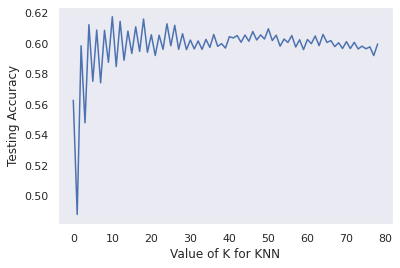

In [185]:
scores = []

# Calculating error for K values between 1 and 80
for i in range(1, 80):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    labels_val = knn.predict(X_val)
    scores.append(f1_score(y_val, labels_val))
plt.plot(scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.grid()

## Distance weighted

In [120]:
#KNN weighted distance
modelKNNW= KNeighborsClassifier(weights='distance', n_neighbors=25)
modelKNNW.fit(X = X_train, y = y_train)
labels_train = modelKNNW.predict(X_train)
labels_val = modelKNNW.predict(X_val)
# print(classification_report(y_val, labels_val))

In [121]:
labels_train = modelKNNW.predict(X_train)
labels_val = modelKNNW.predict(X_val)
f1_score(y_train, labels_train, average = 'micro')

0.9831266133601965

In [122]:
f1_score(y_val, labels_val, average = 'micro')

0.8347497639282342

In [ ]:
# probs = log_model.predict_proba(X_test)
# preds = probs[:,1]
# fpr_log, tpr_log, threshold = metrics.roc_curve(y_test, preds)
# roc_auc_log = metrics.auc(fpr_log, tpr_log)

With manhattan distance

In [ ]:
#modelKNNW= KNeighborsClassifier(n_neighbors=25,p=1)
#modelKNNW.fit(X = X_train, y = y_train)
#labels_train = modelKNNW.predict(X_train)
#labels_val = modelKNNW.predict(X_val)
#print(classification_report(y_val, labels_val))

With minkowski distance

In [ ]:
#KNN with minkowski distance

#modelKNNW= KNeighborsClassifier(n_neighbors=25,p=3)
#modelKNNW.fit(X = X_train, y = y_train)
#labels_train = modelKNNW.predict(X_train)
#labels_val = modelKNNW.predict(X_val)
#print(classification_report(y_val, labels_val))

K-d tree

In [ ]:
#modelKNNT = KNeighborsClassifier(algorithm='kd_tree')
#modelKNNT.fit(X = X_train, y = y_train)
#labels_val = modelKNNT.predict(X_val)
#print(classification_report(y_val, labels_val))

# Decision Tree (0.8155)


In [189]:
# Independent Variable
x = train[metrics]
# Dependent Variable
y = train['Income']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 15, stratify = y)

In [190]:
dt_entropy = DecisionTreeClassifier(criterion = 'entropy').fit(X_train, y_train)
y_pred = dt_entropy.predict(X_test)
# print(confusion_matrix(y_test, y_pred))
# accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average = 'micro')
# print(f1)
# print('The defined three has a depth of ' + str(dt_entropy.get_depth()) + ', ' + str(dt_entropy.tree_.node_count) + 
#       ' nodes and a total of ' + str(dt_entropy.get_n_leaves()) + ' leaves.')

In [191]:
f1

0.8155357142857143

In [192]:
labels_train = dt_entropy.predict(X_train)
f1_score(y_train, labels_train, average = 'micro')

0.9835119047619048

In [ ]:
# fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
# tree.plot_tree(dt_entropy,
#                class_names='Income',
#                filled = True);
# fig.savefig('imagename.png')

In [ ]:
# fig.savefig('dt.png')

In [ ]:
# entropy_importance = DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train).feature_importances_
# entropy_importance

In [ ]:
# #X = train[log_features]
# #y = train['Income']

# X = os_data_X
# y = os_data_y

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
# classifier = DecisionTreeClassifier(max_depth=8,criterion='entropy')
# clf = classifier.fit(X_train, y_train)

In [ ]:
# # Observing the important values in order to see the performance
# y_pred = classifier.predict(X_test)

# cm = confusion_matrix(y_test, y_pred) 
# conf_matrix = pd.DataFrame(data = cm,  
#                            columns = ['Predicted:0', 'Predicted:1'],  
#                            index =['Actual:0', 'Actual:1']) 
# plt.figure(figsize = (8, 5)) 

# # Creating a heatmap
# sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Blues") 
# plt.show() 

# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))


In [ ]:
# # Load libraries
# import pydotplus
# from sklearn import tree
# import collections
# from IPython.display import Image

# # Visualize data
# data_feature_names = X.columns
# # Export as dot file
# dot_data = tree.export_graphviz(clf,
#                                 feature_names=data_feature_names,
#                                 out_file=None,
#                                 filled=True,
#                                 rounded=True)
# graph = pydotplus.graph_from_dot_data(dot_data)

# colors = ('turquoise', 'orange')
# edges = collections.defaultdict(list)

# for edge in graph.get_edge_list():
#     edges[edge.get_source()].append(int(edge.get_destination()))

# for edge in edges:
#     edges[edge].sort()    
#     for i in range(2):
#         dest = graph.get_node(str(edges[edge][i]))[0]
#         dest.set_fillcolor(colors[i])

# # Display the tree
# graph.write_png('tree.png')
# Image('tree.png')

In [ ]:
# y_pred_proba = clf.predict_proba(X_test)[::,1]
# fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
# auc = metrics.roc_auc_score(y_test, y_pred_proba)
# plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
# plt.legend(loc=4)
# plt.show()

In [ ]:
# print("Feature importances:\n{}".format(clf.feature_importances_))
# for col in train[log_features].columns: 
#   print(col) 

Bagging

In [195]:
# x = train[log_features]
# y=train['Income']
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 15, stratify = y)

In [ ]:
# modelKNN_bag = KNeighborsClassifier()

In [ ]:
# bagging_KNN = BaggingClassifier(base_estimator = modelKNN_bag, random_state = 5, max_features = 0.6)

In [ ]:
# bagging_KNN.fit(X = X_train, y = y_train)

In [ ]:
# y_pred_bagging = bagging_KNN.predict(X_test)

In [ ]:
# bagging_KNN.score(X_test, y_test)

In [ ]:
# print(classification_report(y_test, y_pred_bagging))

In [ ]:
# cm = confusion_matrix(y_test, y_pred_bagging)
# f1 = f1_score(y_test, y_pred_bagging)
# print(cm,f1)

Gradient Boost

In [ ]:
# y=train['Income']
# X_train, X_test, y_train, y_test = train_test_split(train[log_features], y, test_size=0.25, random_state=5, stratify=y)

In [ ]:
# gb = GradientBoostingClassifier(random_state = 5, loss = 'exponential')

In [ ]:
# gb.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='exponential', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=5, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
# y_pred_gb = gb.predict(X_test)

In [ ]:
# f1_score(y_test, y_pred_gb, average = 'micro')

In [ ]:
#best score 0.87,
#metrics1 = ['Lives_smean_enc','Education_smean_enc', 'Role_smean_enc', 'Marital_smean_enc','Years of Education',
# 'Working Hours per week','Money Received','Ticket Price','Gender','Age','Continent_smean_enc']
#

# Gradient Boost - mean encoded var (0.8725)

In [196]:
y=train['Income']
X = train[metrics]

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5, stratify=y)

In [198]:
gb = GradientBoostingClassifier(random_state = 5, learning_rate=0.16, n_estimators=170, max_features=10, max_depth=3)

In [199]:
gb.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.16, loss='deviance', max_depth=3,
                           max_features=10, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=170,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=5, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [200]:
y_pred_gb = gb.predict(X_test)

In [201]:
labels_train = gb.predict(X_train)

In [202]:
f1_score(y_train, labels_train,average = 'micro')

0.8824404761904762

In [203]:
f1_score(y_test, y_pred_gb, average = 'micro')

0.8725

In [ ]:
#gradient search results:
#clf.best_params_ #{'learning_rate': 0.16, 'loss': 'exponential', 'n_estimators': 173} the exponential doesn't work.....
#on kaggle didn't increase the score from the one below

In [ ]:
##best score 0.8726
#gb = GradientBoostingClassifier(random_state = 5, learning_rate=0.16, n_estimators=170, max_features=10, max_depth=3),
#metrics1 = ['Lives_smean_enc','Education_smean_enc', 'Role_smean_enc', 'Marital_smean_enc','Years of Education',
# 'Working Hours per week','Money Received','Ticket Price','Gender','Age']
#

In [ ]:
# print(classification_report(y_test, y_pred_gb))

In [ ]:
# import eli5
# from eli5.sklearn import PermutationImportance
# perm = PermutationImportance(gb, random_state=1).fit(X_test, y_test)
# eli5.show_weights(perm, feature_names = X_test.columns.tolist())

In [ ]:
# y_pred_gb = pd.DataFrame(np.transpose(y_pred_gb))
# y_data_gb = pd.concat([X_test.reset_index(), y_pred], axis = 1)
# y_data_gb['y_pred'] = y_data_gb[0]

In [ ]:
# y_data_gb.groupby('y_pred').std().round(2)

# Random Forest (0.86375)

In [204]:
y=train['Income']
X_train, X_test, y_train, y_test = train_test_split(train[metrics], y, test_size=0.25, random_state=5, stratify=y)

In [205]:
modelRF = RandomForestClassifier(class_weight = 'balanced',criterion = 'entropy', max_depth =30, max_features= 10, max_samples = 0.2, n_estimators = 300, random_state = 5)

In [ ]:
#we got 0.869 in f1 micro --> modelRF = RandomForestClassifier(class_weight = 'balanced',criterion = 'entropy', max_depth = 30, max_features= 6, max_samples = 0.2, n_estimators = 300, random_state = 5) 

In [206]:
modelRF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=30, max_features=10,
                       max_leaf_nodes=None, max_samples=0.2,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)

In [ ]:
# estimator = modelRF.estimators_[5]
# export_graphviz(estimator, out_file='tree.dot',rounded = True, proportion = False, precision = 2, filled = True)
# call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Image(filename = 'tree.png')



In [207]:
y_pred = modelRF.predict(X_test)
label_train = modelRF.predict(X_train)

In [208]:
f1_score(y_test,y_pred,average = 'micro')

0.86375

In [209]:
f1_score(y_train,label_train,average = 'micro')

0.9083928571428571

In [ ]:
# print(classification_report(y_test, y_pred))

In [ ]:
  #best params with GridSearch
#'max_features': 20, 'max_samples': 0.2, 'n_estimators': 300

In [ ]:
# train_test_gb = pd.concat([X_test, y_test], axis = 1)
# train_test_gb.groupby('Income').std().round(2)

In [ ]:
# y_pred_test = pd.DataFrame(gb.predict(test[metrics]))
# pd.concat([test['CITIZEN_ID'],y_pred_test], axis = 1).to_csv(r"GBFinal.csv")

# Stacking (0.8727)

In [210]:
y=train['Income']
X = train[metrics]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5, stratify=y)

In [ ]:
# estimators = [tuple(['rf', RandomForestClassifier(random_state = 5)]),
#               tuple(['nb', GaussianNB()]),
#               tuple(['graboost', GradientBoostingClassifier(random_state = 5, learning_rate=0.16, n_estimators=170, max_features=10, max_depth=3)]),
#               tuple(['svm' , svm.SVC()]),
#               tuple(['lr', LogisticRegression()]),
#               tuple(['mlp',  MLPClassifier()]),
#               tuple(['knn', KNeighborsClassifier(n_neighbors=15)]),
#               tuple(['dt', DecisionTreeClassifier(criterion = 'entropy')])
#               ]

In [ ]:
# subsets = []
# for e in range(2, len(estimators)+1):
#     for subset in itertools.combinations(estimators, e):
#       subsets.append(list(subset))

In [ ]:
#tr_scores = []
#te_scores = []
#for i in range(0, len(subsets)):
#  sc = StackingClassifier(estimators=subsets[i], final_estimator=LogisticRegression())
#  sc.fit(X_train, y_train)
#  y_pred_sc = sc.predict(X_test)
#  labels_train = sc.predict(X_train)
#  tr_scores.append(f1_score(y_train, labels_train,average = 'micro'))
#  te_scores.append(f1_score(y_test,y_pred_sc,average = 'micro'))

In [211]:
sc = StackingClassifier(estimators=[('nb', GaussianNB(priors=None, var_smoothing=1e-09)),
 ('graboost',
  GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                             learning_rate=0.16, loss='deviance', max_depth=3,
                             max_features=10, max_leaf_nodes=None,
                             min_impurity_decrease=0.0, min_impurity_split=None,
                             min_samples_leaf=1, min_samples_split=2,
                             min_weight_fraction_leaf=0.0, n_estimators=170,
                             n_iter_no_change=None, presort='deprecated',
                             random_state=5, subsample=1.0, tol=0.0001,
                             validation_fraction=0.1, verbose=0,
                             warm_start=False)),
 ('mlp',
  MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
                beta_2=0.999, early_stopping=False, epsilon=1e-08,
                hidden_layer_sizes=(100,), learning_rate='constant',
                learning_rate_init=0.001, max_fun=15000, max_iter=200,
                momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
                power_t=0.5, random_state=3, shuffle=True, solver='adam',
                tol=0.0001, validation_fraction=0.1, verbose=False,
                warm_start=False))], final_estimator=LogisticRegression())

In [212]:
sc.fit(X_train, y_train)
y_pred_sc = sc.predict(X_test)

In [213]:
labels_train = sc.predict(X_train)

In [214]:
f1_score(y_train, labels_train,average = 'micro')

0.8818452380952381

In [215]:
f1_score(y_test,y_pred_sc,average = 'micro')

0.8726785714285714

In [ ]:
# print(classification_report(y_test, y_pred_sc))

In [ ]:
# perm = PermutationImportance(model, random_state=1).fit(X_test, y_pred_sc)
# eli5.show_weights(perm, feature_names = X_test.columns.tolist())

# ROC curvers and F1 scores

In [ ]:
# X = train

In [ ]:
# X = train[metrics]
# y = train['Income']

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, random_state=15, shuffle=True, stratify=y)
# from sklearn.metrics import roc_curve, roc_auc_score
# # Instantiate the classfiers and make a list
# classifiers = [KNeighborsClassifier(weights='distance', n_neighbors=25), 
#                DecisionTreeClassifier(criterion = 'entropy'),
#               MLPClassifier(activation = 'tanh', hidden_layer_sizes = (50, 100, 50), learning_rate = 'adaptive',
#                       learning_rate_init = 0.05000500000000001, solver = 'sgd', random_state =3 ),
#                RandomForestClassifier(class_weight = 'balanced',criterion = 'entropy', max_depth =30, max_features= 10, max_samples = 0.2, n_estimators = 300, random_state = 5),
#                GradientBoostingClassifier(random_state = 5, learning_rate=0.16, n_estimators=170, max_features=10, max_depth=3),
#                StackingClassifier(estimators=[('nb', GaussianNB(priors=None, var_smoothing=1e-09)),
#  ('graboost',
#   GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
#                              learning_rate=0.16, loss='deviance', max_depth=3,
#                              max_features=10, max_leaf_nodes=None,
#                              min_impurity_decrease=0.0, min_impurity_split=None,
#                              min_samples_leaf=1, min_samples_split=2,
#                              min_weight_fraction_leaf=0.0, n_estimators=170,
#                              n_iter_no_change=None, presort='deprecated',
#                              random_state=5, subsample=1.0, tol=0.0001,
#                              validation_fraction=0.1, verbose=0,
#                              warm_start=False)),
#  ('mlp',
#   MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
#                 beta_2=0.999, early_stopping=False, epsilon=1e-08,
#                 hidden_layer_sizes=(100,), learning_rate='constant',
#                 learning_rate_init=0.001, max_fun=15000, max_iter=200,
#                 momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
#                 power_t=0.5, random_state=3, shuffle=True, solver='adam',
#                 tol=0.0001, validation_fraction=0.1, verbose=False,
#                 warm_start=False))], final_estimator=LogisticRegression())
#                ]

# # Define a result table as a DataFrame
# result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# # Train the models and record the results
# for cls in classifiers:
#   model = cls.fit(X_train, y_train)
#   yproba = model.predict_proba(X_test)[::,1]
    
#   fpr, tpr, _ = roc_curve(y_test,  yproba)
#   auc = roc_auc_score(y_test, yproba)

    
#   result_table = result_table.append({'classifiers':cls.__class__.__name__,
#                                         'fpr':fpr, 
#                                         'tpr':tpr, 
#                                         'auc':auc,
#                                         }, ignore_index=True)

# f1_table = pd.DataFrame(columns=['classifiers', 'f1'])
# for cls in classifiers:
#   cls.fit(X_train, y_train)
#   y_pred = cls.predict(X_test)
#   f1 = f1_score(y_test, y_pred, average = 'micro')
  
#   f1_table = f1_table.append({'classifiers':cls.__class__.__name__,
#                                         'f1':f1,
#                                         }, ignore_index=True)

# # Set name of the classifiers as index labels
# result_table.set_index('classifiers', inplace=True)
# f1_table.set_index('classifiers', inplace = True)

In [ ]:
# fig = plt.figure(figsize=(10,8))

# for i in result_table.index:
#     plt.plot(result_table.loc[i]['fpr'], 
#              result_table.loc[i]['tpr'], 
#              label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
  
# plt.plot(fpr_log, tpr_log, label = 'LogisticRegrClassifier = %0.2f' % roc_auc)


# plt.xticks(np.arange(0.0, 1.1, step=0.1))
# plt.xlabel("False Positive Rate", fontsize=15)

# plt.yticks(np.arange(0.0, 1.1, step=0.1))
# plt.ylabel("True Positive Rate", fontsize=15)

# plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
# plt.legend(prop={'size':13}, loc='lower right')

# plt.show()

In [ ]:
# f1_table = f1_table.sort_values(by="f1")
# figsize=(50, 50)
# plt.bar(f1_table.index, f1_table['f1'])
# plt.ylim(ymin=0.77, ymax=0.89) 
# plt.xticks(rotation=45)
# plt.show()

In [ ]:
# f1_tests = [0.8169642857142857, 0.8347497639282342, 0.8573214285714286, 0.86375, 0.8725, 0.8726785714285714]
# f1_trains = [0.9835119047619048, 0.9831266133601965, 0.8611904761904762, 0.9083928571428571, 0.8824404761904762, 0.8818452380952381]
# classifier_names = ['Decision Tree', 'KNN', 'Neural Network', 'Random Forest Classifier', 'GradientBoost', 'Stacking']

In [ ]:
# plt.figure(figsize=(10, 5))
# # set width of bar
# barWidth = 0.25
 
# # set height of bar
# bars1 = f1_tests
# bars2 = f1_trains
 
# # Set position of bar on X axis
# r1 = np.arange(len(bars1))
# r2 = [x + barWidth for x in r1]
 
# # Make the plot
# plt.bar(r1, bars1, width=barWidth, edgecolor='white', label='f1_test')
# plt.bar(r2, bars2, width=barWidth, edgecolor='white', label='f1_train')
 
# # Add xticks on the middle of the group bars
# plt.xlabel('classifiers', fontweight='bold')
# plt.xticks([r + barWidth for r in range(len(bars1))], classifier_names)
 
# # Create legend & Show graphic
# plt.xticks(rotation=45)
# plt.ylim(ymin=0.55, ymax=1) 

# plt.legend()
# plt.show()


# GB vs STACKING

In [221]:
#gb prepare data for checking mean and std for each variable for level of income
y_pred_gb = pd.DataFrame(np.transpose(y_pred_gb))
y_data_gb = pd.concat([X_test.reset_index(), y_pred_gb], axis = 1)
y_data_gb['y_pred'] = y_data_gb[0]

In [233]:
#sc prepare data for checking mean and std for each variable for level of income
y_pred_sc = pd.DataFrame(np.transpose(y_pred_sc))
y_data_sc = pd.concat([X_test.reset_index(), y_pred_sc], axis = 1)
y_data_sc['y_pred'] = y_data_sc[0]

In [224]:
#how the test is actually classified
train_test = pd.concat([X_test, y_test], axis = 1)
train_test.groupby('Income').mean().round(3)

,Years of Education,Working Hours per week,Money Received,Ticket Price,Gender,Age,Lives_smean_enc,Education_smean_enc,Role_smean_enc,Marital_smean_enc,Continent_smean_enc,Employment_smean_enc,Area_smean_enc
Income,,,,,,,,,,,,,
0,0.564,0.387,0.002,0.012,0.631,0.27,0.398,0.258,0.426,0.381,0.847,0.290,0.686
1,0.665,0.450,0.037,0.046,0.840,0.37,0.836,0.464,0.696,0.861,0.922,0.346,0.707


In [225]:
#classification and mean for gb
y_data_gb.groupby('y_pred').mean().round(3)

,index,Years of Education,Working Hours per week,Money Received,Ticket Price,Gender,Age,Lives_smean_enc,Education_smean_enc,Role_smean_enc,Marital_smean_enc,Continent_smean_enc,Employment_smean_enc,Area_smean_enc,0
y_pred,,,,,,,,,,,,,,,
0,10769.532,0.560,0.388,0.002,0.011,0.636,0.273,0.409,0.25,0.417,0.393,0.848,0.285,0.686,0.0
1,12552.684,0.701,0.460,0.045,0.059,0.863,0.379,0.885,0.54,0.793,0.916,0.935,0.377,0.712,1.0


In [ ]:
#between the two models there's no difference in any of the variables regarding the mean.
#below we are checking the standard deviation, which are also the same.

In [226]:
y_data_gb.groupby('y_pred').std().round(2)

,index,Years of Education,Working Hours per week,Money Received,Ticket Price,Gender,Age,Lives_smean_enc,Education_smean_enc,Role_smean_enc,Marital_smean_enc,Continent_smean_enc,Employment_smean_enc,Area_smean_enc,0
y_pred,,,,,,,,,,,,,,,
0,6609.41,0.12,0.13,0.02,0.07,0.48,0.19,0.40,0.20,0.32,0.45,0.32,0.14,0.12,0.0
1,5715.25,0.12,0.11,0.15,0.15,0.34,0.13,0.23,0.28,0.27,0.27,0.19,0.23,0.05,0.0


In [235]:
y_data_sc.groupby('y_pred').std().round(2)

,index,Years of Education,Working Hours per week,Money Received,Ticket Price,Gender,Age,Lives_smean_enc,Education_smean_enc,Role_smean_enc,Marital_smean_enc,Continent_smean_enc,Employment_smean_enc,Area_smean_enc,0
y_pred,,,,,,,,,,,,,,,
0,6611.91,0.12,0.13,0.02,0.07,0.48,0.19,0.40,0.20,0.32,0.45,0.32,0.15,0.12,0.0
1,5683.62,0.12,0.11,0.15,0.15,0.35,0.13,0.23,0.28,0.27,0.27,0.20,0.23,0.06,0.0


In [ ]:
#the only different thing between one and the other is the precision score for 0s which is higher by 0.01 in stacking.
#it can be found above in the models or in the report.

# Statistical Tests for Stacking

In [236]:
#classification and mean for stacking
y_data_sc.groupby('y_pred').mean().round(3)[['Years of Education','Age','Gender']]

,Years of Education,Age,Gender
y_pred,,,
0,0.560,0.273,0.637
1,0.701,0.380,0.859


In [237]:
#reate Men and Women variables from Gender for testing chisquare
y_data_sc['Men'] = y_data_sc['Gender']

# create a list of our conditions
conditions = [
    (y_data_sc['Gender'] <= 0),
    (y_data_sc['Gender'] == 1),
]

# create a list of the values we want to assign for each condition
values = [1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
y_data_sc['Women'] = np.select(conditions, values)

In [238]:
#chisquare test for gender
feature_selection.chi2(y_data_sc[['Men','Women']], y_data_sc['y_pred'])
#we can reject the null hp that they have the same mean

(array([ 64.10529061, 136.44757386]), array([1.17944391e-15, 1.59263552e-31]))

In [239]:
#preparing years of education for t test
a = y_data_sc[y_data_sc['y_pred']==1]['Years of Education']
b = y_data_sc[y_data_sc['y_pred']==0]['Years of Education']
#b needs to have same length as a. we sample randomly from b.
c = b.sample(n=a.shape[0], random_state=1)

In [240]:
#t test for years of education
tStat, pValue =  stats.ttest_rel(a, c)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:3.4046118937315354e-123 T-Statistic:26.963220415367772


In [241]:
#preparing age for t test
a = y_data_sc[y_data_sc['y_pred']==1]['Age']
b = y_data_sc[y_data_sc['y_pred']==0]['Age']
#b needs to have same length as a. we sample randomly from b.
c = b.sample(n=a.shape[0], random_state=1)

In [242]:
#t test for age
tStat, pValue =  stats.ttest_rel(a, c)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:5.020207745921948e-45 T-Statistic:14.746579140993793


# test predict - kaggle

In [ ]:
# y_pred_test = pd.DataFrame(gb.predict(test[metrics]))
# pd.concat([test['CITIZEN_ID'],y_pred_test], axis = 1).to_csv(r"xxxx.csv")